In [1]:
# Importar las librerías necesarias
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA  
from sklearn.cluster import KMeans  


# Cargar y Explorar los Datos
Carga el archivo parquet usando pandas y realiza una exploración inicial de los datos, incluyendo estadísticas descriptivas y visualización de distribuciones.

In [2]:
# Cargar el archivo parquet
file_path = '../../data/processed/merged_inmuebles24_departamentos_20250927.parquet'
df = pd.read_parquet(file_path)

In [3]:
# Exploración inicial de los datos
# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
df.head()


Primeras filas del DataFrame:


precio_mxn  lote_m2  recamaras  baños  estacionamiento  es_amueblado  \
0     12000.0       50        1.0    1.0              1.0             1   
1     34100.0      232        3.0    4.0              2.0             0   
2     26000.0      180        3.0    2.0              2.0             0   
3     32000.0      120        2.0    2.0              2.0             0   
4     23000.0      103        2.0    2.0              2.0             0   

   es_penthouse  cuenta_con_cocina_integral  cuenta_con_sala  \
0             0                           0                1   
1             0                           1                1   
2             0                           1                0   
3             0                           0                1   
4             0                           1                1   

   cuenta_con_closet  ...   P_6A11_M  VPH_2YMASD  POB65_MAS  VPH_CISTER  \
0                  1  ...   8.333333   69.333333  37.666667   79.666667   
1                  1  ...   8.298893   43.387454  26.520295   37.339483   
2                  1  ...  10.782805   70.072398  33.266968   65.097285   
3                  0  ...   1.852174   24.660870  19.478261   21.295652   
4                  1  ...   8.709677   99.645161  73.516129  128.774194   

     P18YM_PB  P18YM_PB_M   P_0A2_F  VPH_NDACMM      POBTOT  _merge  
0  198.000000   89.000000  3.000000   26.666667  253.000000    both  
1  112.332103   53.992620  2.442804   37.815498  238.413284    both  
2  170.669683   82.717195  4.436652   45.744344  316.757919    both  
3   59.426087   29.008696  0.365217   10.469565   94.991304    both  
4  246.483871  125.419355  3.483871   16.548387  368.612903    both  

[5 rows x 119 columns]

In [4]:
# Información general del DataFrame
print("\nInformación general del DataFrame:")
df.info()



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10262 entries, 0 to 10261
Columns: 119 entries, precio_mxn to _merge
dtypes: Int64(1), category(1), float64(96), int64(16), object(5)
memory usage: 9.3+ MB


In [5]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
df.describe(include='all')


Estadísticas descriptivas:


precio_mxn      lote_m2     recamaras         baños  \
count    10262.000000      10184.0  10262.000000  10262.000000   
unique            NaN         <NA>           NaN           NaN   
top               NaN         <NA>           NaN           NaN   
freq              NaN         <NA>           NaN           NaN   
mean     37412.575319   311.287804      1.932664      1.732313   
std      29052.171357  13681.16612      0.832794      0.766697   
min         12.000000          1.0      0.000000      0.000000   
25%      20000.000000         62.0      1.000000      1.000000   
50%      29000.000000         89.0      2.000000      2.000000   
75%      44000.000000        131.0      2.000000      2.000000   
max     447840.000000    1080000.0     23.000000     12.000000   

        estacionamiento  es_amueblado  es_penthouse  \
count      10262.000000  10262.000000  10262.000000   
unique              NaN           NaN           NaN   
top                 NaN           NaN           NaN   
freq                NaN           NaN           NaN   
mean           1.331807      0.308809      0.037615   
std            0.875619      0.462025      0.190271   
min            0.000000      0.000000      0.000000   
25%            1.000000      0.000000      0.000000   
50%            1.000000      0.000000      0.000000   
75%            2.000000      1.000000      0.000000   
max           22.000000      1.000000      1.000000   

        cuenta_con_cocina_integral  cuenta_con_sala  cuenta_con_closet  ...  \
count                 10262.000000     10262.000000       10262.000000  ...   
unique                         NaN              NaN                NaN  ...   
top                            NaN              NaN                NaN  ...   
freq                           NaN              NaN                NaN  ...   
mean                      0.312805         0.541123           0.230267  ...   
std                       0.463658         0.498330           0.421024  ...   
min                       0.000000         0.000000           0.000000  ...   
25%                       0.000000         0.000000           0.000000  ...   
50%                       0.000000         1.000000           0.000000  ...   
75%                       1.000000         1.000000           0.000000  ...   
max                       1.000000         1.000000           1.000000  ...   

            P_6A11_M    VPH_2YMASD     POB65_MAS    VPH_CISTER      P18YM_PB  \
count   10262.000000  10262.000000  10262.000000  10262.000000  10262.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        7.778705     51.361955     26.837893     40.131336    131.813565   
std         7.595733     38.581960     16.611190     40.274219     92.841878   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         5.501779     25.348837     17.302326      4.697674     65.790698   
50%         5.627907     45.589091     21.840000     37.000000    106.941818   
75%         5.723122     50.008772     27.481178     51.096774    134.225681   
max        46.795359    239.347826    127.761905    315.188406    638.388889   

          P18YM_PB_M       P_0A2_F    VPH_NDACMM        POBTOT  _merge  
count   10262.000000  10262.000000  10262.000000  10262.000000   10262  
unique           NaN           NaN           NaN           NaN       1  
top              NaN           NaN           NaN           NaN    both  
freq             NaN           NaN           NaN           NaN   10262  
mean       63.975480      2.707370     32.617956    234.591180     NaN  
std        43.392565      3.361885     22.564828    174.984177     NaN  
min         0.000000      0.000000      0.000000      0.000000     NaN  
25%        32.837209      1.534884     25.069767    147.395349 

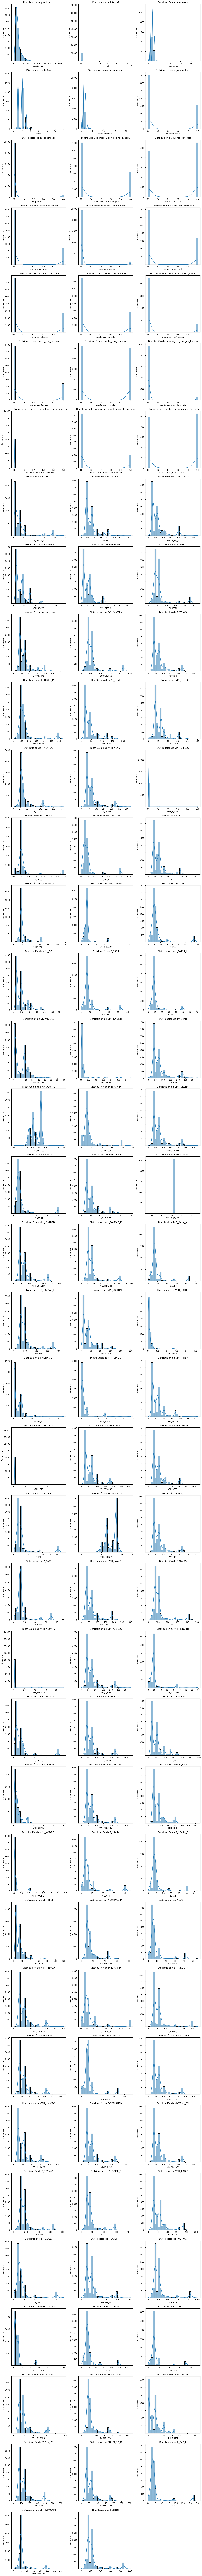

In [6]:
# Visualización de distribuciones
# Seleccionar columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Crear subplots para las columnas numéricas
num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribución de {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frecuencia")

# Eliminar ejes vacíos si hay menos subplots que espacios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

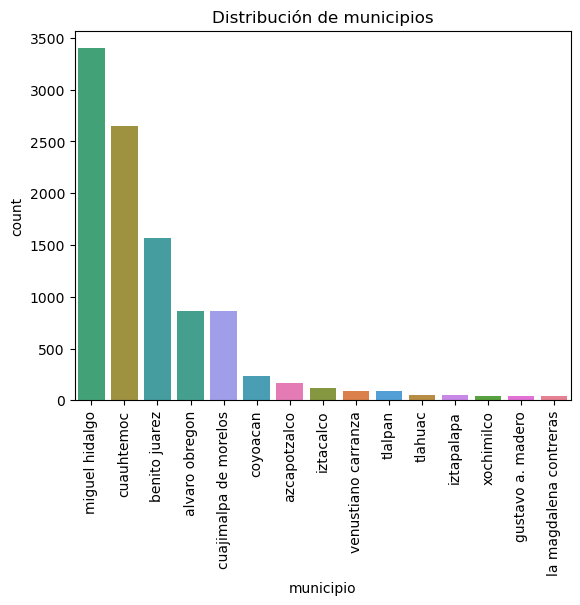

In [7]:
municipio_order = df['municipio'].value_counts().index

sns.countplot(data=df, x='municipio', order=municipio_order, hue='municipio')
plt.xticks(rotation=90)
plt.title('Distribución de municipios')
plt.show()

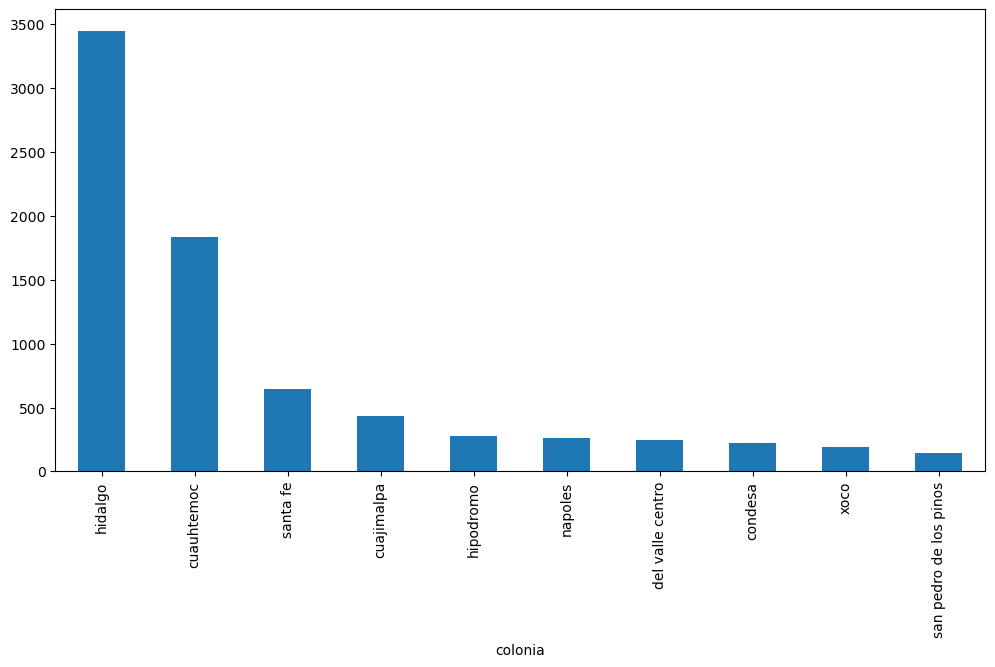

In [8]:
df.colonia.value_counts().head(10).plot(kind='bar', figsize=(12,6))
plt.show()

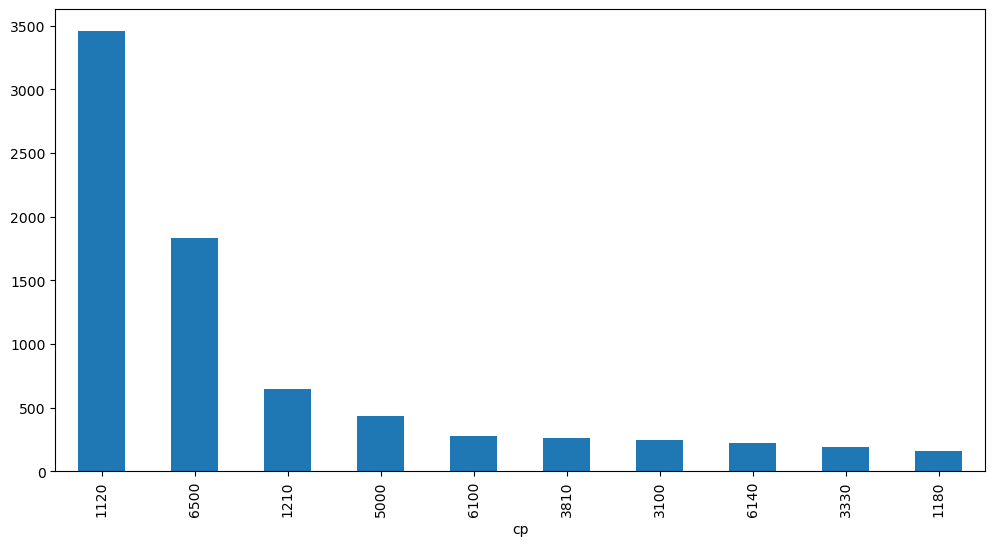

In [9]:
# Un CP puede contener varias colonias, así que nos quedamos sólo con colonias
df.cp.value_counts().head(10).plot(kind='bar', figsize=(12,6))
plt.show()

In [10]:
top10_cols= list(df.colonia.value_counts().head(10).index)

In [11]:
df['colonia_top10'] = df['colonia'].where(df['colonia'].isin(top10_cols), 'otros')

# Preprocesamiento de Datos
Aplica técnicas de limpieza de datos, manejo de valores nulos y codificación de variables categóricas.

In [12]:
# Identificar valores nulos en el DataFrame
print("\nValores nulos por columna:")
df.isnull().sum().sort_values(ascending=False)


Valores nulos por columna:


lote_m2          78
precio_mxn        0
P_18A24_F         0
P_12A14           0
VPH_NODREN        0
                 ..
PHOGJEF_M         0
TOTHOG            0
OCUPVIVPAR        0
VIVPAR_HAB        0
colonia_top10     0
Length: 120, dtype: int64

In [13]:
# outliers
# Función para detectar outliers usando el método del rango intercuartílico (IQR) 
def detectar_outliers_iqr(data, columna):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    return outliers

In [14]:
cols = ['precio_mxn', 'lote_m2', 'recamaras', 'baños', 'estacionamiento']


Número de outliers en precio_mxn: 704
     precio_mxn
87     111960.0
199    121290.0
254    119424.0
268    153012.0
299     95000.0

Número de outliers en lote_m2: 918
     lote_m2
6        273
7        405
33      1200
74       250
108      575

Número de outliers en recamaras: 162
     recamaras
6          5.0
33         6.0
349        4.0
635        4.0
687        4.0

Número de outliers en baños: 190
     baños
1      4.0
6      4.0
349    4.0
389   12.0
430    4.0

Número de outliers en estacionamiento: 162
      estacionamiento
185              22.0
577               4.0
702               4.0
743               4.0
1413              7.0


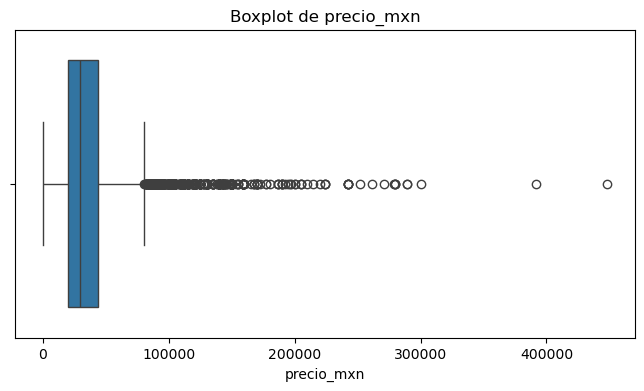

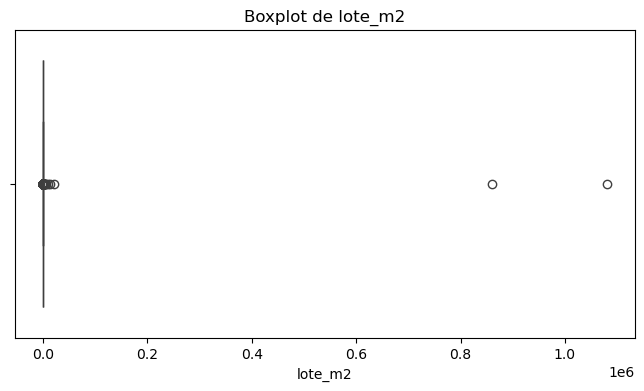

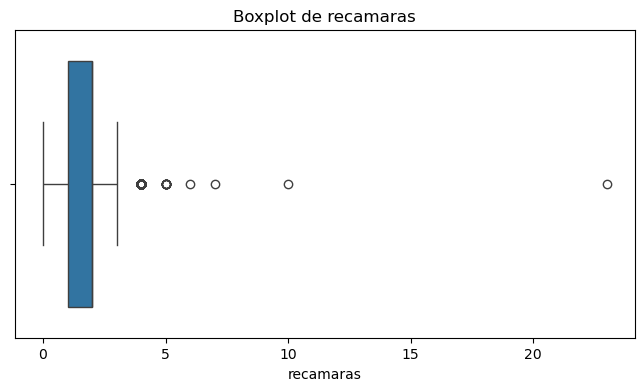

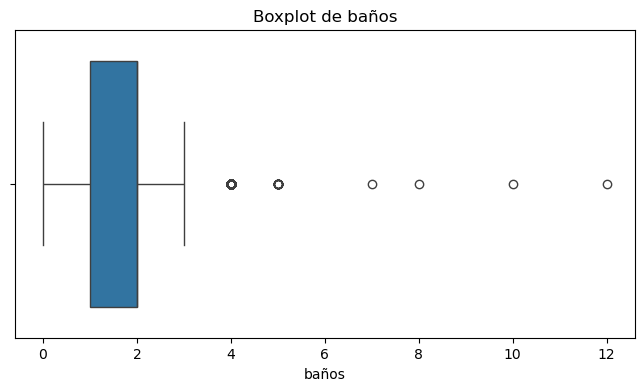

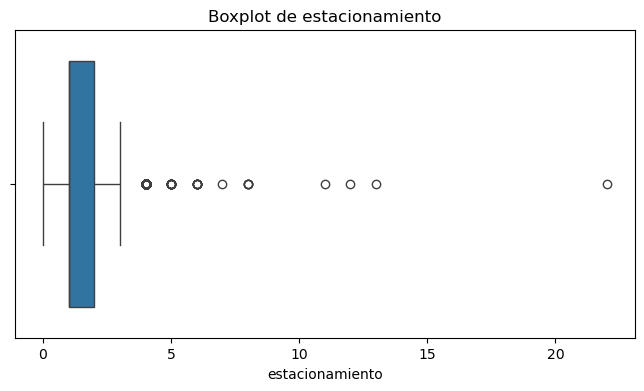

In [15]:
# Aplicar la función a las columnas numéricas
for col in cols:
    outliers = detectar_outliers_iqr(df, col)
    print(f"\nNúmero de outliers en {col}: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers[[col]].head())
    # Visualizar outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")  

identificamos 2 outliers evidentes y muy seprados del resto de los datos en lote_m2, los cuales eliminamos

In [16]:
df.sort_values('lote_m2', ascending=False).head(5)

precio_mxn  lote_m2  recamaras  baños  estacionamiento  es_amueblado  \
4471     22000.0  1080000        3.0    2.0              1.0             0   
5471     26000.0   860000        2.0    2.0              2.0             1   
6971     11000.0    20410        1.0    1.0              0.0             0   
7240     20000.0    13000        2.0    2.0              1.0             0   
1904     37000.0    10000        2.0    2.0              2.0             0   

      es_penthouse  cuenta_con_cocina_integral  cuenta_con_sala  \
4471             0                           0                1   
5471             0                           1                0   
6971             0                           0                0   
7240             0                           0                0   
1904             0                           0                1   

      cuenta_con_closet  ...  VPH_2YMASD  POB65_MAS  VPH_CISTER    P18YM_PB  \
4471                  0  ...   32.483516  22.164835    6.593407   79.923077   
5471                  0  ...   47.287187  23.640648   42.328424  127.902798   
6971                  0  ...   38.647059  24.372549   36.901961  104.078431   
7240                  1  ...   60.160131  29.532680   74.830065  161.186275   
1904                  0  ...   25.348837  17.302326    4.697674   65.790698   

      P18YM_PB_M   P_0A2_F  VPH_NDACMM      POBTOT  _merge  colonia_top10  
4471   38.780220  1.670330   21.824176  160.406593    both          otros  
5471   63.640648  1.916053   30.743741  210.988218    both     cuauhtemoc  
6971   51.254902  1.901961   33.450980  193.352941    both          otros  
7240   77.248366  2.267974   31.748366  222.199346    both          otros  
1904   32.837209  1.534884   25.069767  147.395349    both        hidalgo  

[5 rows x 120 columns]

In [17]:
# Identificar los índices de los dos outliers más grandes
outliers = df.sort_values('lote_m2', ascending=False).head(2).index

In [18]:
# Eliminar los outliers del DataFrame
df = df.drop(outliers)


In [19]:
categorical_columns = list(df.select_dtypes(include=["object", "category"]).columns)
categorical_columns.remove('direccion')

In [20]:
df = pd.get_dummies(df, columns=['municipio','colonia_top10'], drop_first=True)

In [21]:
df.head()

precio_mxn  lote_m2  recamaras  baños  estacionamiento  es_amueblado  \
0     12000.0       50        1.0    1.0              1.0             1   
1     34100.0      232        3.0    4.0              2.0             0   
2     26000.0      180        3.0    2.0              2.0             0   
3     32000.0      120        2.0    2.0              2.0             0   
4     23000.0      103        2.0    2.0              2.0             0   

   es_penthouse  cuenta_con_cocina_integral  cuenta_con_sala  \
0             0                           0                1   
1             0                           1                1   
2             0                           1                0   
3             0                           0                1   
4             0                           1                1   

   cuenta_con_closet  ...  colonia_top10_cuajimalpa  colonia_top10_cuauhtemoc  \
0                  1  ...                     False                     False   
1                  1  ...                     False                     False   
2                  1  ...                     False                     False   
3                  0  ...                     False                     False   
4                  1  ...                     False                     False   

   colonia_top10_del valle centro  colonia_top10_hidalgo  \
0                           False                  False   
1                           False                  False   
2                           False                  False   
3                           False                  False   
4                           False                  False   

   colonia_top10_hipodromo  colonia_top10_napoles  colonia_top10_otros  \
0                    False                  False                 True   
1                    False                  False                 True   
2                    False                  False                 True   
3                    False                  False                 True   
4                    False                  False                 True   

   colonia_top10_san pedro de los pinos  colonia_top10_santa fe  \
0                                 False                   False   
1                                 False                   False   
2                                 False                   False   
3                                 False                   False   
4                                 False                   False   

   colonia_top10_xoco  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 142 columns]

In [22]:
df.shape

(10260, 142)

# Clustering
Realiza un análisis de clustering para agrupar los datos en diferentes segmentos.

In [23]:
df_analysis = df.drop(['direccion','colonia','precio_mxn','cp','neighbourhood','_merge'], axis=1)

In [24]:
df_analysis['random'] = np.random.rand(len(df_analysis))

In [25]:
cols = df_analysis.columns

In [26]:
# Escalar los datos
scaler = StandardScaler()
df_analysis[cols] = scaler.fit_transform(df_analysis[cols])

In [27]:
## Arreglar los nulos y quitar esta celda
df_analysis = df_analysis.dropna()

In [28]:
df_analysis.dtypes[120:]

municipio_la magdalena contreras        float64
municipio_miguel hidalgo                float64
municipio_tlahuac                       float64
municipio_tlalpan                       float64
municipio_venustiano carranza           float64
municipio_xochimilco                    float64
colonia_top10_cuajimalpa                float64
colonia_top10_cuauhtemoc                float64
colonia_top10_del valle centro          float64
colonia_top10_hidalgo                   float64
colonia_top10_hipodromo                 float64
colonia_top10_napoles                   float64
colonia_top10_otros                     float64
colonia_top10_san pedro de los pinos    float64
colonia_top10_santa fe                  float64
colonia_top10_xoco                      float64
random                                  float64
dtype: object

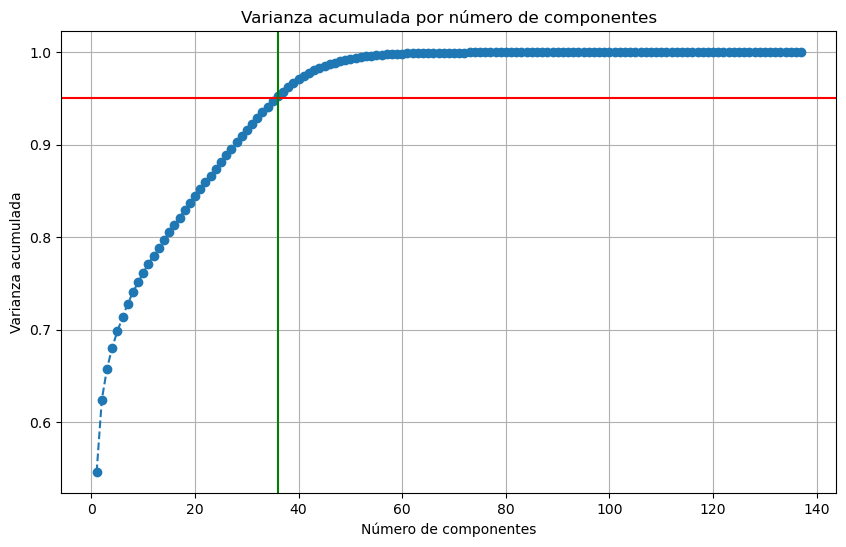

Número óptimo de componentes: 36


In [29]:
# Crear el modelo PCA sin especificar n_components
pca = PCA()
pca.fit(df_analysis)

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

#Gráfica de la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza acumulada por número de componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='-')
plt.grid()
plt.show()

# Elegir el número de componentes que expliquen al menos el 95% de la varianza
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Número óptimo de componentes: {n_components}")



In [30]:
print("Varianza acumulada:")
print(cumulative_variance)


Varianza acumulada:
[0.54581177 0.62426578 0.65773401 0.68059208 0.69814993 0.713257
 0.72791778 0.74030641 0.75107771 0.7615429  0.77132249 0.78001034
 0.78865233 0.79690785 0.80512896 0.81321908 0.82117345 0.82896142
 0.83665008 0.84427157 0.85178751 0.85920614 0.86657717 0.87391074
 0.88116814 0.88838356 0.89552806 0.90247636 0.90938295 0.91611879
 0.92278384 0.92912488 0.9354055  0.94128425 0.94682297 0.95220055
 0.95721898 0.96205056 0.96642965 0.97069476 0.97425424 0.97751177
 0.98040249 0.98276803 0.98484738 0.9868537  0.98857192 0.99017592
 0.9916655  0.99286009 0.99390553 0.99490983 0.99567342 0.99631729
 0.99689502 0.99737151 0.99776603 0.99807902 0.99835327 0.9985573
 0.99872618 0.9988718  0.99901015 0.99911808 0.99922045 0.99930988
 0.9993924  0.99947177 0.99954469 0.99959861 0.99964735 0.99969057
 0.99973068 0.99976793 0.99979923 0.99982696 0.99985102 0.99987397
 0.99989241 0.99990898 0.99992302 0.99993426 0.99994455 0.9999544
 0.99996134 0.99996779 0.9999729  0.99997756 0

In [31]:
# Aplicar PCA con el número óptimo de componentes
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(df_analysis)

In [32]:
# Importancia de cada componente (varianza explicada)
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:")
for i, var in enumerate(explained_variance):
    print(f"Componente {i+1}: {var:.2%}")

Varianza explicada por cada componente:
Componente 1: 54.58%
Componente 2: 7.85%
Componente 3: 3.35%
Componente 4: 2.29%
Componente 5: 1.76%
Componente 6: 1.51%
Componente 7: 1.47%
Componente 8: 1.24%
Componente 9: 1.08%
Componente 10: 1.05%
Componente 11: 0.98%
Componente 12: 0.87%
Componente 13: 0.86%
Componente 14: 0.83%
Componente 15: 0.82%
Componente 16: 0.81%
Componente 17: 0.80%
Componente 18: 0.78%
Componente 19: 0.77%
Componente 20: 0.76%
Componente 21: 0.75%
Componente 22: 0.74%
Componente 23: 0.74%
Componente 24: 0.73%
Componente 25: 0.73%
Componente 26: 0.72%
Componente 27: 0.71%
Componente 28: 0.69%
Componente 29: 0.69%
Componente 30: 0.67%
Componente 31: 0.67%
Componente 32: 0.63%
Componente 33: 0.63%
Componente 34: 0.59%
Componente 35: 0.55%
Componente 36: 0.54%


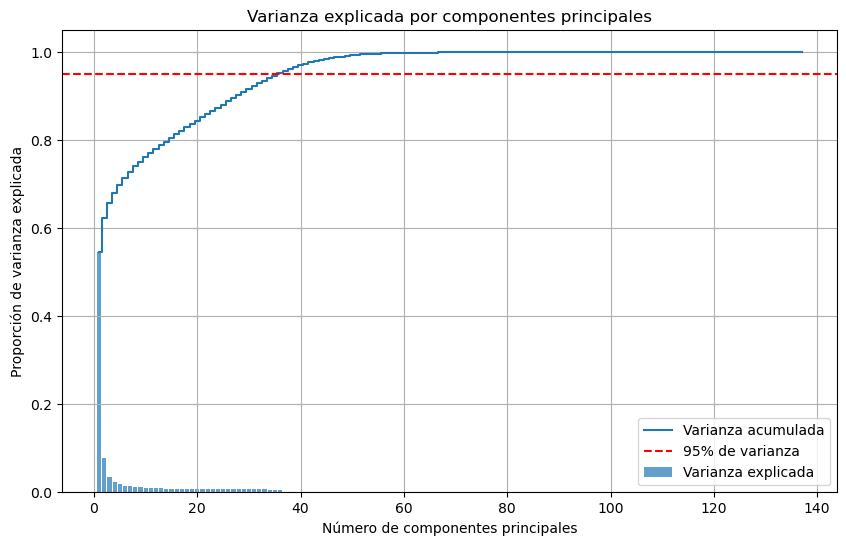

In [33]:
# Gráfica de varianza explicada por cada componente
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Varianza explicada')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Varianza acumulada')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% de varianza')
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('Varianza explicada por componentes principales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [34]:
# Contribución de las características originales a los primeros 22 componentes
components = pd.DataFrame(pca.components_[:20], columns=df_analysis.columns)
print("\nContribución de las características originales a los primeros 22 componentes:")
components.T.sort_values(by = 0, ascending=False)


Contribución de las características originales a los primeros 22 componentes:


0         1         2         3         4   \
P_18YMAS                  0.115705  0.020307 -0.016555  0.006577 -0.006459   
P_18YMAS_M                0.115663  0.021544 -0.006478  0.011925 -0.002227   
P_18YMAS_F                0.115617  0.019234 -0.025169  0.001994 -0.010078   
HOGJEF_M                  0.115582 -0.022184 -0.013860  0.007031  0.002072   
PHOGJEF_F                 0.115178  0.015934  0.000404  0.001541 -0.011175   
...                            ...       ...       ...       ...       ...   
municipio_cuauhtemoc     -0.007974 -0.116180  0.229622  0.342861  0.174610   
colonia_top10_hipodromo  -0.009989 -0.053264  0.071726  0.099491  0.150099   
es_amueblado             -0.013541  0.003678  0.031443  0.102097 -0.018431   
municipio_miguel hidalgo -0.050754  0.170651 -0.160263 -0.106339 -0.122719   
colonia_top10_hidalgo    -0.051415  0.172952 -0.160658 -0.107886 -0.121779   

                                5         6         7         8         9   \
P_18YMAS                 -0.012240 -0.013362  0.007986  0.003865 -0.008983   
P_18YMAS_M               -0.008317 -0.018922  0.008098  0.005909 -0.006884   
P_18YMAS_F               -0.015575 -0.008609  0.007887  0.002130 -0.010768   
HOGJEF_M                  0.016499 -0.008107  0.003775  0.004406  0.009777   
PHOGJEF_F                -0.032850 -0.018740  0.010816 -0.010446 -0.026444   
...                            ...       ...       ...       ...       ...   
municipio_cuauhtemoc      0.072632 -0.159060  0.002146  0.159365 -0.075045   
colonia_top10_hipodromo   0.027553 -0.011453 -0.136787  0.007129  0.219022   
es_amueblado              0.091889 -0.141643  0.151543 -0.036069  0.067771   
municipio_miguel hidalgo  0.076511 -0.306677  0.104257 -0.004546  0.047961   
colonia_top10_hidalgo     0.070163 -0.304876  0.105541 -0.001234  0.051183   

                                10        11        12        13        14  \
P_18YMAS                  0.002506 -0.008484  0.000053  0.007088  0.008304   
P_18YMAS_M                0.005187 -0.007965  0.000318  0.005567  0.003600   
P_18YMAS_F                0.000176 -0.008927 -0.000169  0.008384  0.012320   
HOGJEF_M                  0.002208 -0.006587  0.003078  0.001765 -0.010849   
PHOGJEF_F                -0.001625 -0.013483  0.004962 -0.002995  0.012650   
...                            ...       ...       ...       ...       ...   
municipio_cuauhtemoc      0.034969  0.046344  0.075981  0.010385 -0.047187   
colonia_top10_hipodromo   0.375305 -0.024052 -0.296509  0.098393 -0.299004   
es_amueblado             -0.238767 -0.006223 -0.291042  0.128319 -0.084164   
municipio_miguel hidalgo  0.046054 -0.131124 -0.026395  0.030890 -0.034069   
colonia_top10_hidalgo     0.044264 -0.128189 -0.019160  0.028011 -0.035103   

                                15        16        17        18        19  
P_18YMAS                 -0.003513 -0.003109 -0.000233  0.001233 -0.004204  
P_18YMAS_M               -0.001591 -0.000742 -0.003429  0.002330 -0.001607  
P_18YMAS_F               -0.005156 -0.005125  0.002503  0.000305 -0.006420  
HOGJEF_M                 -0.000754 -0.006935 -0.007415 -0.001955  0.010592  
PHOGJEF_F                 0.000849 -0.009078 -0.003983  0.016926 -0.015285  
...                            ...       ...       ...       ...       ...  
municipio_cuauhtemoc     -0.016672  0.004945 -0.001707  0.008863  0.002703  
colonia_top10_hipodromo   0.285581 -0.046180  0.075800 -0.146698  0.017006  
es_amueblado             -0.128514 -0.069968 -0.113336 -0.125293 -0.034675  
municipio_miguel hidalgo  0.086916 -0.047600  0.036206  0.037551 -0.010768  
colonia_top10_hidalgo     0.085945 -0.040039  0.034902  0.025784 -0.007538  

[137 rows x 20 columns]

In [35]:
most_important_features = components.iloc[0].abs().sort_values(ascending=False).head(35)
print("Características más importantes del primer componente:")
print(most_important_features)

Características más importantes del primer componente:
P_18YMAS      0.115705
P_18YMAS_M    0.115663
P_18YMAS_F    0.115617
HOGJEF_M      0.115582
PHOGJEF_F     0.115178
POBFEM        0.115081
P_15A49_F     0.115036
POBTOT        0.114992
POBHOG        0.114981
OCUPVIVPAR    0.114981
TVIVPARHAB    0.114850
TOTHOG        0.114850
TVIVHAB       0.114850
VIVPARH_CV    0.114838
VPH_C_ELEC    0.114832
VPH_TV        0.114817
VPH_EXCSA     0.114760
POBMAS        0.114753
VPH_DRENAJ    0.114739
VPH_DSADMA    0.114705
VPH_2YMASD    0.114469
VPH_RADIO     0.114462
VPH_AGUADV    0.114126
VPH_CEL       0.114122
VPH_C_SERV    0.114030
PHOGJEF_M     0.114006
VIVPAR_HAB    0.113926
VPH_TINACO    0.113828
VPH_AEASP     0.113759
VIVTOT        0.113701
VPH_REFRI     0.113681
VPH_LAVAD     0.112707
TVIVPAR       0.112393
P18YM_PB      0.112189
P18YM_PB_M    0.112187
Name: 0, dtype: float64


In [36]:
# Reconstrucción aproximada de los datos originales
reconstructed_data = pca.inverse_transform(pca_data)

In [37]:

# Comparar los datos originales con los reconstruidos
print("Datos originales (primeras filas):")
df_analysis.head()

Datos originales (primeras filas):


lote_m2  recamaras     baños  estacionamiento  es_amueblado  es_penthouse  \
0 -0.247414  -1.119825 -0.955050        -0.378897      1.496207     -0.197718   
1  0.388445   1.281806  2.957694         0.763137     -0.668357     -0.197718   
2  0.206771   1.281806  0.349198         0.763137     -0.668357     -0.197718   
3 -0.002853   0.080991  0.349198         0.763137     -0.668357     -0.197718   
4 -0.062247   0.080991  0.349198         0.763137     -0.668357     -0.197718   

   cuenta_con_cocina_integral  cuenta_con_sala  cuenta_con_closet  \
0                   -0.674620         0.920860           1.828097   
1                    1.482315         0.920860           1.828097   
2                    1.482315        -1.085942           1.828097   
3                   -0.674620         0.920860          -0.547017   
4                    1.482315         0.920860           1.828097   

   cuenta_con_balcon  ...  colonia_top10_cuauhtemoc  \
0          -0.233157  ...                 -0.466385   
1          -0.233157  ...                 -0.466385   
2          -0.233157  ...                 -0.466385   
3          -0.233157  ...                 -0.466385   
4          -0.233157  ...                 -0.466385   

   colonia_top10_del valle centro  colonia_top10_hidalgo  \
0                       -0.156407              -0.710987   
1                       -0.156407              -0.710987   
2                       -0.156407              -0.710987   
3                       -0.156407              -0.710987   
4                       -0.156407              -0.710987   

   colonia_top10_hipodromo  colonia_top10_napoles  colonia_top10_otros  \
0                -0.166266              -0.162197             1.732501   
1                -0.166266              -0.162197             1.732501   
2                -0.166266              -0.162197             1.732501   
3                -0.166266              -0.162197             1.732501   
4                -0.166266              -0.162197             1.732501   

   colonia_top10_san pedro de los pinos  colonia_top10_santa fe  \
0                             -0.118889               -0.259003   
1                             -0.118889               -0.259003   
2                             -0.118889               -0.259003   
3                             -0.118889               -0.259003   
4                             -0.118889               -0.259003   

   colonia_top10_xoco    random  
0           -0.137361  1.297831  
1           -0.137361  1.613467  
2           -0.137361 -0.398934  
3           -0.137361  0.845777  
4           -0.137361  1.300048  

[5 rows x 137 columns]

In [38]:
print("\nDatos reconstruidos (primeras filas):")
pd.DataFrame(reconstructed_data, columns=df_analysis.columns).head()


Datos reconstruidos (primeras filas):


lote_m2  recamaras     baños  estacionamiento  es_amueblado  es_penthouse  \
0 -0.342848  -1.383735 -1.052734        -0.537651      1.205586      0.093139   
1  0.422453   1.553334  1.617328         1.410893     -0.901046      0.275601   
2  0.268975   0.708315  0.680603         0.615950     -0.756191      0.103730   
3  0.087444   0.198071  0.199859         0.434815     -0.629680      0.168316   
4 -0.080433   0.049439  0.324137         0.621845     -0.564957     -0.206378   

   cuenta_con_cocina_integral  cuenta_con_sala  cuenta_con_closet  \
0                   -0.484741        -0.097981           1.683628   
1                    1.947907         0.598705           1.895690   
2                    1.992738        -1.385543           1.886285   
3                   -0.265545         0.684719          -0.354114   
4                    1.561948         0.858110           2.013981   

   cuenta_con_balcon  ...  colonia_top10_cuauhtemoc  \
0          -0.088718  ...                 -0.898947   
1          -0.115730  ...                 -0.844761   
2          -0.261933  ...                 -0.879630   
3          -0.245223  ...                 -0.829629   
4          -0.298884  ...                 -0.426341   

   colonia_top10_del valle centro  colonia_top10_hidalgo  \
0                       -0.368050              -0.600527   
1                       -1.044556              -0.094919   
2                       -0.590399              -0.332717   
3                       -0.765240              -0.448707   
4                       -0.073291              -1.128811   

   colonia_top10_hipodromo  colonia_top10_napoles  colonia_top10_otros  \
0                -0.033857              -0.543916             2.081242   
1                -0.387782              -0.822976             1.933225   
2                -0.320300              -0.457364             1.924785   
3                -0.174996              -0.505684             2.176890   
4                 0.121369              -0.206604             2.495370   

   colonia_top10_san pedro de los pinos  colonia_top10_santa fe  \
0                              0.217477                0.354193   
1                             -0.361006                0.639721   
2                             -0.367733                0.289647   
3                             -0.378314                0.654916   
4                             -0.600726               -0.880627   

   colonia_top10_xoco    random  
0           -0.556208  1.273994  
1           -1.110038  1.522945  
2           -0.510577 -0.517628  
3           -1.153395  0.734297  
4           -0.089835  1.255370  

[5 rows x 137 columns]

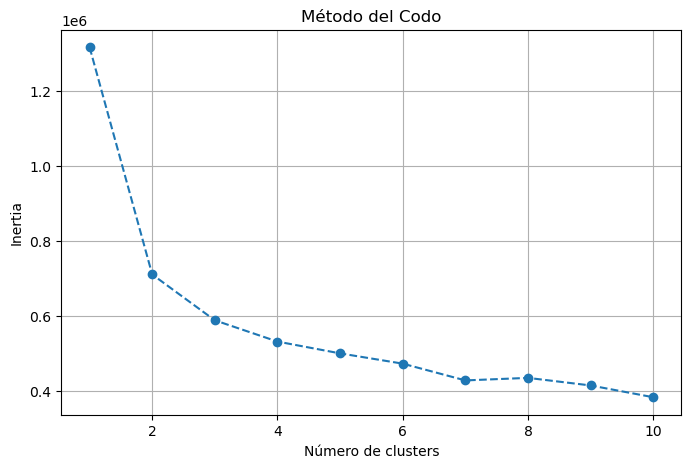

In [39]:
# Calcular la inertia para diferentes números de clusters
inertia = []
for k in range(1, 11):  # Probar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)  # Usa los datos reducidos por PCA
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.title('Método del Codo')
plt.grid()
plt.show()

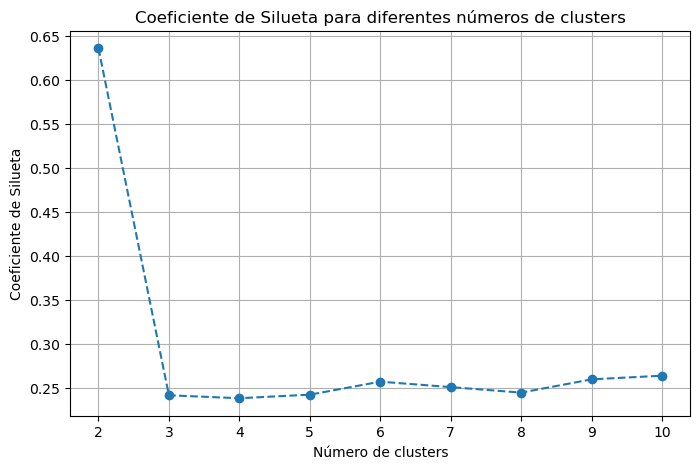

In [40]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de silueta para diferentes números de clusters
silhouette_scores = []
for k in range(2, 11):  # Probar de 2 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    score = silhouette_score(pca_data, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes números de clusters')
plt.grid()
plt.show()

In [41]:
# Aplicar el algoritmo K-Means para clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(df_analysis)

/var/folders/c7/mdvpp7_n2dj49y88d6cj51kc0000gn/T/ipykernel_23312/1743315256.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_analysis['Cluster'] = clusters


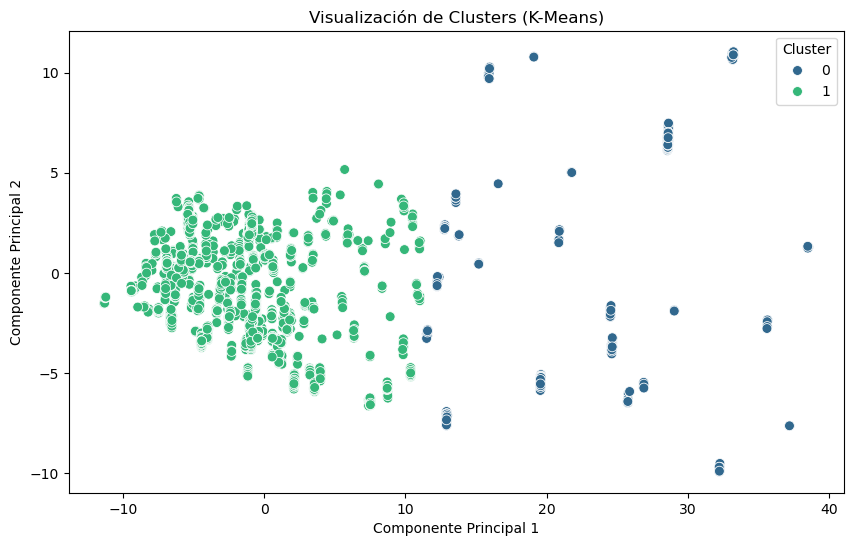

In [42]:

# Agregar los clusters al DataFrame original
df_analysis['Cluster'] = clusters

# Visualizar los clusters en el espacio reducido por PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette="viridis", s=50)
plt.title("Visualización de Clusters (K-Means)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()

In [43]:
import plotly.express as px

# Crear un DataFrame con los datos de PCA y clusters
df_pca = pd.DataFrame(pca_data[:,:3], columns=['PC1', 'PC2', 'PC3'])  # Asegúrate de que pca_data tenga al menos 3 componentes
df_pca['Cluster'] = clusters  # Agregar los clusters al DataFrame

# Graficar en 3D con plotly
fig = px.scatter_3d(
    df_pca,
    x='PC1', y='PC2', z='PC3',  # Ejes del gráfico
    color='Cluster',            # Colorear por cluster
    title="Visualización de Clusters en 3D (K-Means)",
    opacity=0.3,                # Transparencia de los puntos
    size_max=1,                 # Tamaño máximo de los puntos
    symbol_sequence=['circle'], # Usar círculos como símbolo
    color_continuous_scale='Viridis'  # Paleta de colores
)

# Ajustar el tamaño del gráfico
fig.update_layout(
    width=600,  # Ancho del gráfico
    height=600   # Alto del gráfico
)

# Mostrar el gráfico interactivo
fig.show()

In [44]:
# Mostrar el tamaño de cada cluster
cluster_sizes = df_analysis['Cluster'].value_counts()
print("\nTamaño de cada cluster:")
cluster_sizes


Tamaño de cada cluster:


Cluster
1    9277
0     905
Name: count, dtype: int64

In [45]:
# Calcular las características promedio de cada cluster
numeric_columns = df_analysis.select_dtypes('number')
cluster_means = numeric_columns.groupby(df_analysis['Cluster']).mean()
cluster_means.T

Cluster                                      0         1
lote_m2                              -0.007343  0.000716
recamaras                             0.086298 -0.005346
baños                                 0.212288 -0.014788
estacionamiento                       0.379514 -0.032975
es_amueblado                         -0.350249  0.031854
...                                        ...       ...
colonia_top10_san pedro de los pinos -0.118889  0.011678
colonia_top10_santa fe               -0.259003  0.024336
colonia_top10_xoco                    1.419898 -0.137361
random                               -0.017810  0.001612
Cluster                               0.000000  1.000000

[138 rows x 2 columns]

In [46]:
df_analysis.columns

Index(['lote_m2', 'recamaras', 'baños', 'estacionamiento', 'es_amueblado',
       'es_penthouse', 'cuenta_con_cocina_integral', 'cuenta_con_sala',
       'cuenta_con_closet', 'cuenta_con_balcon',
       ...
       'colonia_top10_del valle centro', 'colonia_top10_hidalgo',
       'colonia_top10_hipodromo', 'colonia_top10_napoles',
       'colonia_top10_otros', 'colonia_top10_san pedro de los pinos',
       'colonia_top10_santa fe', 'colonia_top10_xoco', 'random', 'Cluster'],
      dtype='object', length=138)

In [47]:
loadings = pd.DataFrame(
            pca.components_.T,
            columns=[f'PC{i+1}' for i in range(pca.n_components_)],
            index=df_analysis.drop('Cluster',axis =1).columns
        )

In [48]:
feature_importance_pca = np.sum(
            loadings.abs() * pca.explained_variance_ratio_, axis=1
        )
feature_importance_pca = feature_importance_pca.sort_values(ascending=False)

In [51]:
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
feature_importance_pca.sort_values(ascending=False, inplace = True)

In [52]:
feature_importance_pca

VPH_NDACMM                              7.380384e-02
POB65_MAS                               7.324368e-02
VPH_CVJ                                 7.300528e-02
P_6A11_F                                7.269917e-02
P_60YMAS_F                              7.267791e-02
VPH_STVP                                7.263460e-02
VPH_SINRTV                              7.259236e-02
P_60YMAS                                7.254284e-02
P_3A5_M                                 7.251927e-02
P_15A17_F                               7.245462e-02
P_12A14_F                               7.234426e-02
VPH_AUTOM                               7.227135e-02
VPH_1DOR                                7.223635e-02
P_60YMAS_M                              7.208326e-02
colonia_top10_cuajimalpa                7.206860e-02
P_6A11                                  7.202180e-02
VPH_2CUART                              7.198567e-02
P_0A2_F                                 7.171273e-02
P_8A14_F                                7.1534

In [53]:
feature_importance_pca.index

Index(['VPH_NDACMM', 'POB65_MAS', 'VPH_CVJ', 'P_6A11_F', 'P_60YMAS_F',
       'VPH_STVP', 'VPH_SINRTV', 'P_60YMAS', 'P_3A5_M', 'P_15A17_F',
       ...
       'municipio_tlahuac', 'cuenta_con_comedor', 'cuenta_con_balcon',
       'cuenta_con_sala', 'lote_m2', 'municipio_gustavo a. madero',
       'municipio_tlalpan', 'random', 'cuenta_con_salon_usos_multiples',
       'VPH_NDEAED'],
      dtype='object', length=137)

In [54]:
random_position = feature_importance_pca.index.get_loc('random')
# Quedarse solo con las features antes de 'random'
filtered_features = feature_importance_pca.iloc[:random_position]
        

In [58]:
filtered_features.index

Index(['VPH_NDACMM', 'POB65_MAS', 'VPH_CVJ', 'P_6A11_F', 'P_60YMAS_F',
       'VPH_STVP', 'VPH_SINRTV', 'P_60YMAS', 'P_3A5_M', 'P_15A17_F',
       ...
       'municipio_la magdalena contreras', 'cuenta_con_cocina_integral',
       'colonia_top10_santa fe', 'municipio_tlahuac', 'cuenta_con_comedor',
       'cuenta_con_balcon', 'cuenta_con_sala', 'lote_m2',
       'municipio_gustavo a. madero', 'municipio_tlalpan'],
      dtype='object', length=134)

In [62]:
final_features = list(filtered_features.index)

# Entrenamiento de Modelos

## Regresión Lineal

Usando todas las 134 features
Forma del dataset: X (10260, 134), y (10260,)
Features seleccionadas: ['VPH_NDACMM', 'POB65_MAS', 'VPH_CVJ', 'P_6A11_F', 'P_60YMAS_F', 'VPH_STVP', 'VPH_SINRTV', 'P_60YMAS', 'P_3A5_M', 'P_15A17_F', 'P_12A14_F', 'VPH_AUTOM', 'VPH_1DOR', 'P_60YMAS_M', 'colonia_top10_cuajimalpa', 'P_6A11', 'VPH_2CUART', 'P_0A2_F', 'P_8A14_F', 'HOGJEF_F', 'P_12A14_M', 'P_6A11_M', 'P_8A14', 'P_12A14', 'P_15A17', 'VPH_PC', 'P_3A5', 'VPH_TELEF', 'VPH_SINLTC', 'VPH_HMICRO', 'VPH_1CUART', 'VPH_MOTO', 'P_8A14_M', 'VPH_INTER', 'P18YM_PB_F', 'P_0A2', 'VPH_SINCINT', 'P18YM_PB', 'P_3A5_F', 'VPH_3YMASC', 'VPH_AEASP', 'P_15A17_M', 'P_0A2_M', 'TVIVPAR', 'P18YM_PB_M', 'P_18A24', 'P_18A24_F', 'P_18A24_M', 'VPH_SPMVPI', 'VIVPAR_DES', 'VPH_LAVAD', 'VPH_C_SERV', 'VPH_AGUADV', 'VPH_REFRI', 'VIVTOT', 'VPH_TINACO', 'PHOGJEF_M', 'VIVPAR_HAB', 'VPH_CEL', 'VPH_2YMASD', 'VPH_BICI', 'VPH_TV', 'VPH_DSADMA', 'VPH_DRENAJ', 'VPH_EXCSA', 'TVIVHAB', 'TVIVPARHAB', 'TOTHOG', 'VIVPARH_CV', 'VPH_C_ELEC', 'VPH_RAD

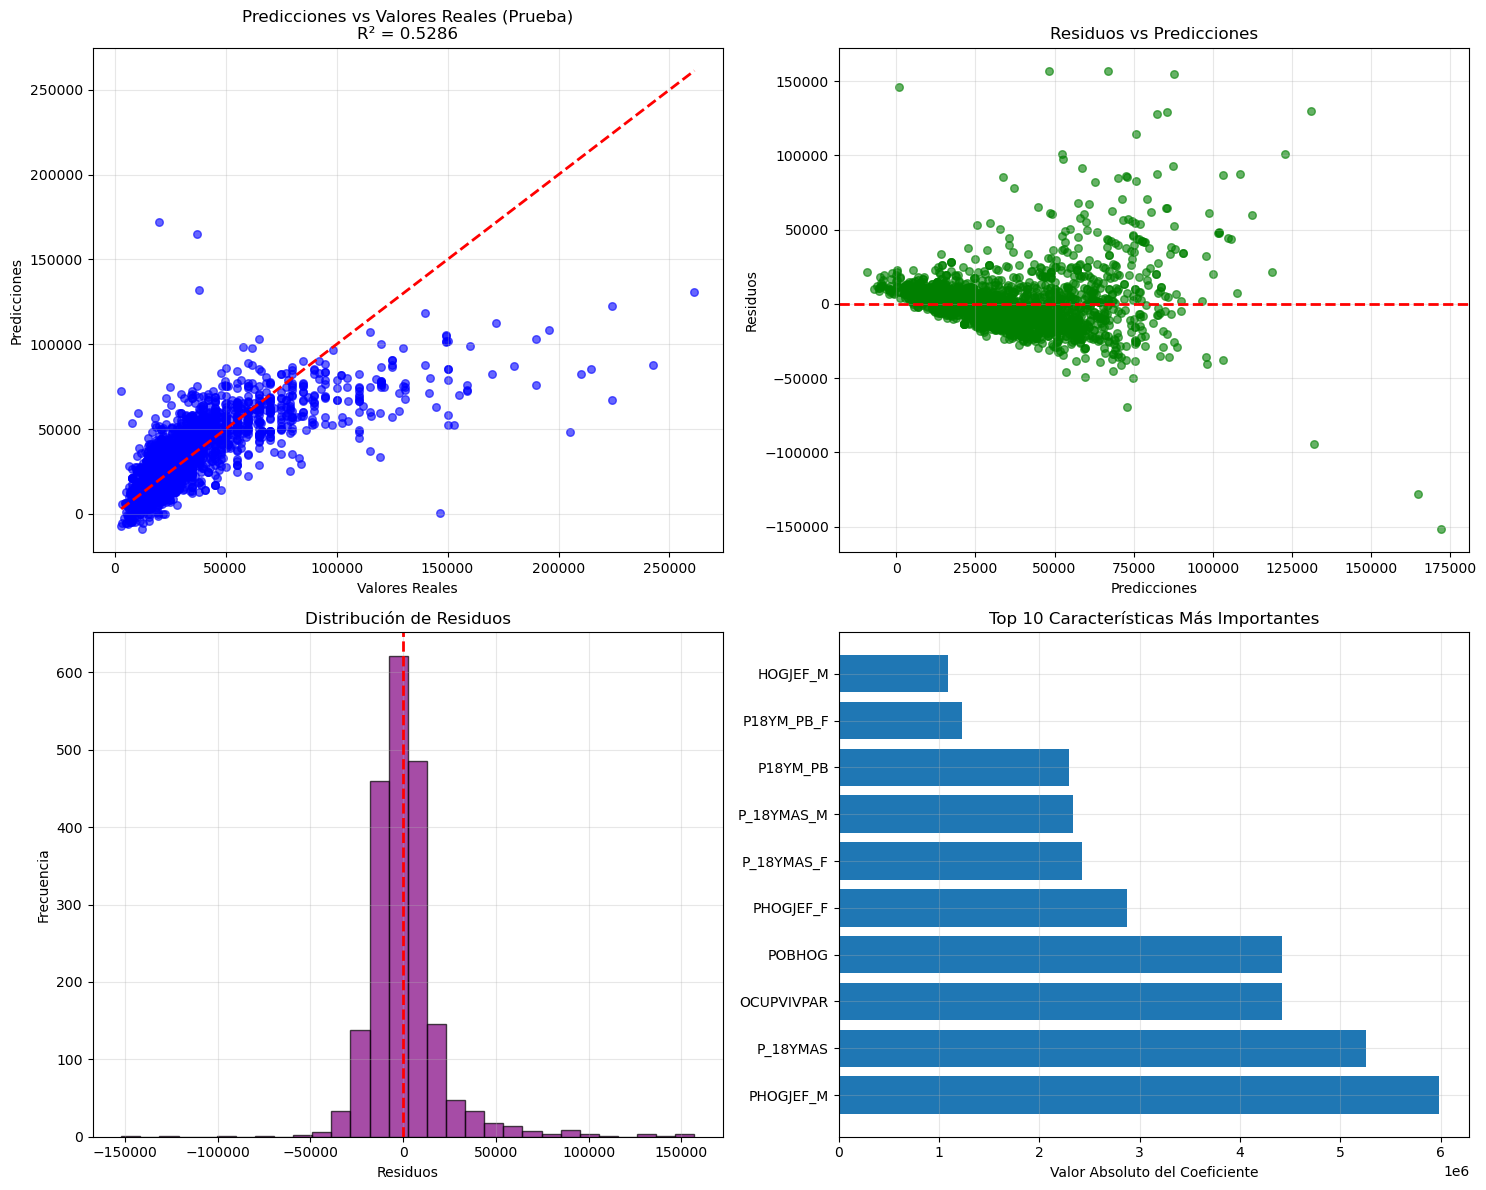


Comparación Entrenamiento vs Prueba:
Métrica  Entrenamiento       Prueba
    MSE   3.669011e+08 3.988621e+08
   RMSE   1.915466e+04 1.997153e+04
    MAE   1.229319e+04 1.271007e+04
     R²   5.672578e-01 5.285854e-01

✅ Modelo con buen rendimiento y generalización

Modelo entrenado exitosamente con 134 características


In [ ]:
# Regresión Lineal con Pipeline Completo
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Seleccionar las características (X) y la variable objetivo (y)
target_column = 'precio_mxn'

# Filtrar features antes de 'random' si existe
if 'random' in final_features:
    final_features_filtered = final_features[:final_features.index('random')]
    print(f"Filtradas {len(final_features_filtered)} features antes de 'random'")
else:
    final_features_filtered = final_features
    print(f"Usando todas las {len(final_features_filtered)} features")

X = df[final_features_filtered]
y = df[target_column]

print(f"Forma del dataset: X {X.shape}, y {y.shape}")
print(f"Features seleccionadas: {final_features_filtered}")

# Verificar valores faltantes
print(f"\nValores faltantes en X: {X.isnull().sum().sum()}")
print(f"Valores faltantes en y: {y.isnull().sum()}")

# Eliminar filas con valores faltantes si los hay
if X.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
    mask = ~(X.isnull().any(axis=1) | y.isnull())
    X = X[mask]
    y = y[mask]
    print(f"Después de eliminar NaN: X {X.shape}, y {y.shape}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=None  # Para regresión no usamos stratify
)

print(f"\nDivisión de datos:")
print(f"Entrenamiento: X {X_train.shape}, y {y_train.shape}")
print(f"Prueba: X {X_test.shape}, y {y_test.shape}")

# Crear el pipeline con StandardScaler y LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
print("\nEntrenando el modelo...")
pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Evaluar el modelo
def evaluate_model(y_true, y_pred, dataset_name=""):
    """Función para evaluar el modelo con múltiples métricas"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\nResultados {dataset_name}:")
    print(f"Error cuadrático medio (MSE): {mse:,.2f}")
    print(f"Raíz del error cuadrático medio (RMSE): {rmse:,.2f}")
    print(f"Error absoluto medio (MAE): {mae:,.2f}")
    print(f"Coeficiente de determinación (R²): {r2:.4f}")
    
    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

# Evaluar en entrenamiento y prueba
train_metrics = evaluate_model(y_train, y_pred_train, "Entrenamiento")
test_metrics = evaluate_model(y_test, y_pred_test, "Prueba")

# Validación cruzada
print(f"\nValidación cruzada (5-fold):")
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"R² promedio: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

cv_scores_rmse = cross_val_score(pipeline, X_train, y_train, cv=5, 
                                scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores_rmse)
print(f"RMSE promedio: {cv_rmse.mean():,.2f} (+/- {cv_rmse.std() * 2:,.2f})")

# Análisis de coeficientes
scaler = pipeline.named_steps['scaler']
regressor = pipeline.named_steps['regressor']

# Obtener coeficientes e importancia
feature_importance = pd.DataFrame({
    'feature': final_features_filtered,
    'coefficient': regressor.coef_,
    'abs_coefficient': np.abs(regressor.coef_)
}).sort_values('abs_coefficient', ascending=False)

print(f"\nTop 10 características más importantes:")
print(feature_importance.head(10).to_string(index=False))

# Visualizaciones mejoradas
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Predicciones vs Valores Reales (Prueba)
axes[0,0].scatter(y_test, y_pred_test, alpha=0.6, color='blue', s=30)
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
               color='red', linestyle='--', linewidth=2)
axes[0,0].set_title(f"Predicciones vs Valores Reales (Prueba)\nR² = {test_metrics['r2']:.4f}")
axes[0,0].set_xlabel("Valores Reales")
axes[0,0].set_ylabel("Predicciones")
axes[0,0].grid(True, alpha=0.3)

# 2. Residuos vs Predicciones
residuals_test = y_test - y_pred_test
axes[0,1].scatter(y_pred_test, residuals_test, alpha=0.6, color='green', s=30)
axes[0,1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0,1].set_title("Residuos vs Predicciones")
axes[0,1].set_xlabel("Predicciones")
axes[0,1].set_ylabel("Residuos")
axes[0,1].grid(True, alpha=0.3)

# 3. Distribución de residuos
axes[1,0].hist(residuals_test, bins=30, alpha=0.7, color='purple', edgecolor='black')
axes[1,0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1,0].set_title("Distribución de Residuos")
axes[1,0].set_xlabel("Residuos")
axes[1,0].set_ylabel("Frecuencia")
axes[1,0].grid(True, alpha=0.3)

# 4. Importancia de características (Top 10)
top_10_features = feature_importance.head(10)
axes[1,1].barh(range(len(top_10_features)), top_10_features['abs_coefficient'])
axes[1,1].set_yticks(range(len(top_10_features)))
axes[1,1].set_yticklabels(top_10_features['feature'])
axes[1,1].set_title("Top 10 Características Más Importantes")
axes[1,1].set_xlabel("Valor Absoluto del Coeficiente")
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Comparación Entrenamiento vs Prueba
comparison_df = pd.DataFrame({
    'Métrica': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Entrenamiento': [train_metrics['mse'], train_metrics['rmse'], 
                     train_metrics['mae'], train_metrics['r2']],
    'Prueba': [test_metrics['mse'], test_metrics['rmse'], 
              test_metrics['mae'], test_metrics['r2']]
})

print(f"\nComparación Entrenamiento vs Prueba:")
print(comparison_df.to_string(index=False))

# Detectar posible overfitting
if train_metrics['r2'] - test_metrics['r2'] > 0.1:
    print(f"\n⚠️  Posible overfitting detectado:")
    print(f"   Diferencia R²: {train_metrics['r2'] - test_metrics['r2']:.4f}")
elif test_metrics['r2'] < 0.5:
    print(f"\n⚠️  Modelo con bajo rendimiento:")
    print(f"   R² en prueba: {test_metrics['r2']:.4f}")
else:
    print(f"\n✅ Modelo con buen rendimiento y generalización")

# Guardar el modelo entrenado y métricas
model_results = {
    'pipeline': pipeline,
    'train_metrics': train_metrics,
    'test_metrics': test_metrics,
    'feature_importance': feature_importance,
    'cv_scores': cv_scores
}

print(f"\nModelo entrenado exitosamente con {len(final_features_filtered)} características")


### RandomForestRegressor

Forma del dataset: X (10260, 134), y (10260,)
Features seleccionadas: ['VPH_NDACMM', 'POB65_MAS', 'VPH_CVJ', 'P_6A11_F', 'P_60YMAS_F', 'VPH_STVP', 'VPH_SINRTV', 'P_60YMAS', 'P_3A5_M', 'P_15A17_F', 'P_12A14_F', 'VPH_AUTOM', 'VPH_1DOR', 'P_60YMAS_M', 'colonia_top10_cuajimalpa', 'P_6A11', 'VPH_2CUART', 'P_0A2_F', 'P_8A14_F', 'HOGJEF_F', 'P_12A14_M', 'P_6A11_M', 'P_8A14', 'P_12A14', 'P_15A17', 'VPH_PC', 'P_3A5', 'VPH_TELEF', 'VPH_SINLTC', 'VPH_HMICRO', 'VPH_1CUART', 'VPH_MOTO', 'P_8A14_M', 'VPH_INTER', 'P18YM_PB_F', 'P_0A2', 'VPH_SINCINT', 'P18YM_PB', 'P_3A5_F', 'VPH_3YMASC', 'VPH_AEASP', 'P_15A17_M', 'P_0A2_M', 'TVIVPAR', 'P18YM_PB_M', 'P_18A24', 'P_18A24_F', 'P_18A24_M', 'VPH_SPMVPI', 'VIVPAR_DES', 'VPH_LAVAD', 'VPH_C_SERV', 'VPH_AGUADV', 'VPH_REFRI', 'VIVTOT', 'VPH_TINACO', 'PHOGJEF_M', 'VIVPAR_HAB', 'VPH_CEL', 'VPH_2YMASD', 'VPH_BICI', 'VPH_TV', 'VPH_DSADMA', 'VPH_DRENAJ', 'VPH_EXCSA', 'TVIVHAB', 'TVIVPARHAB', 'TOTHOG', 'VIVPARH_CV', 'VPH_C_ELEC', 'VPH_RADIO', 'POBFEM', 'P_15A49_F', 'O

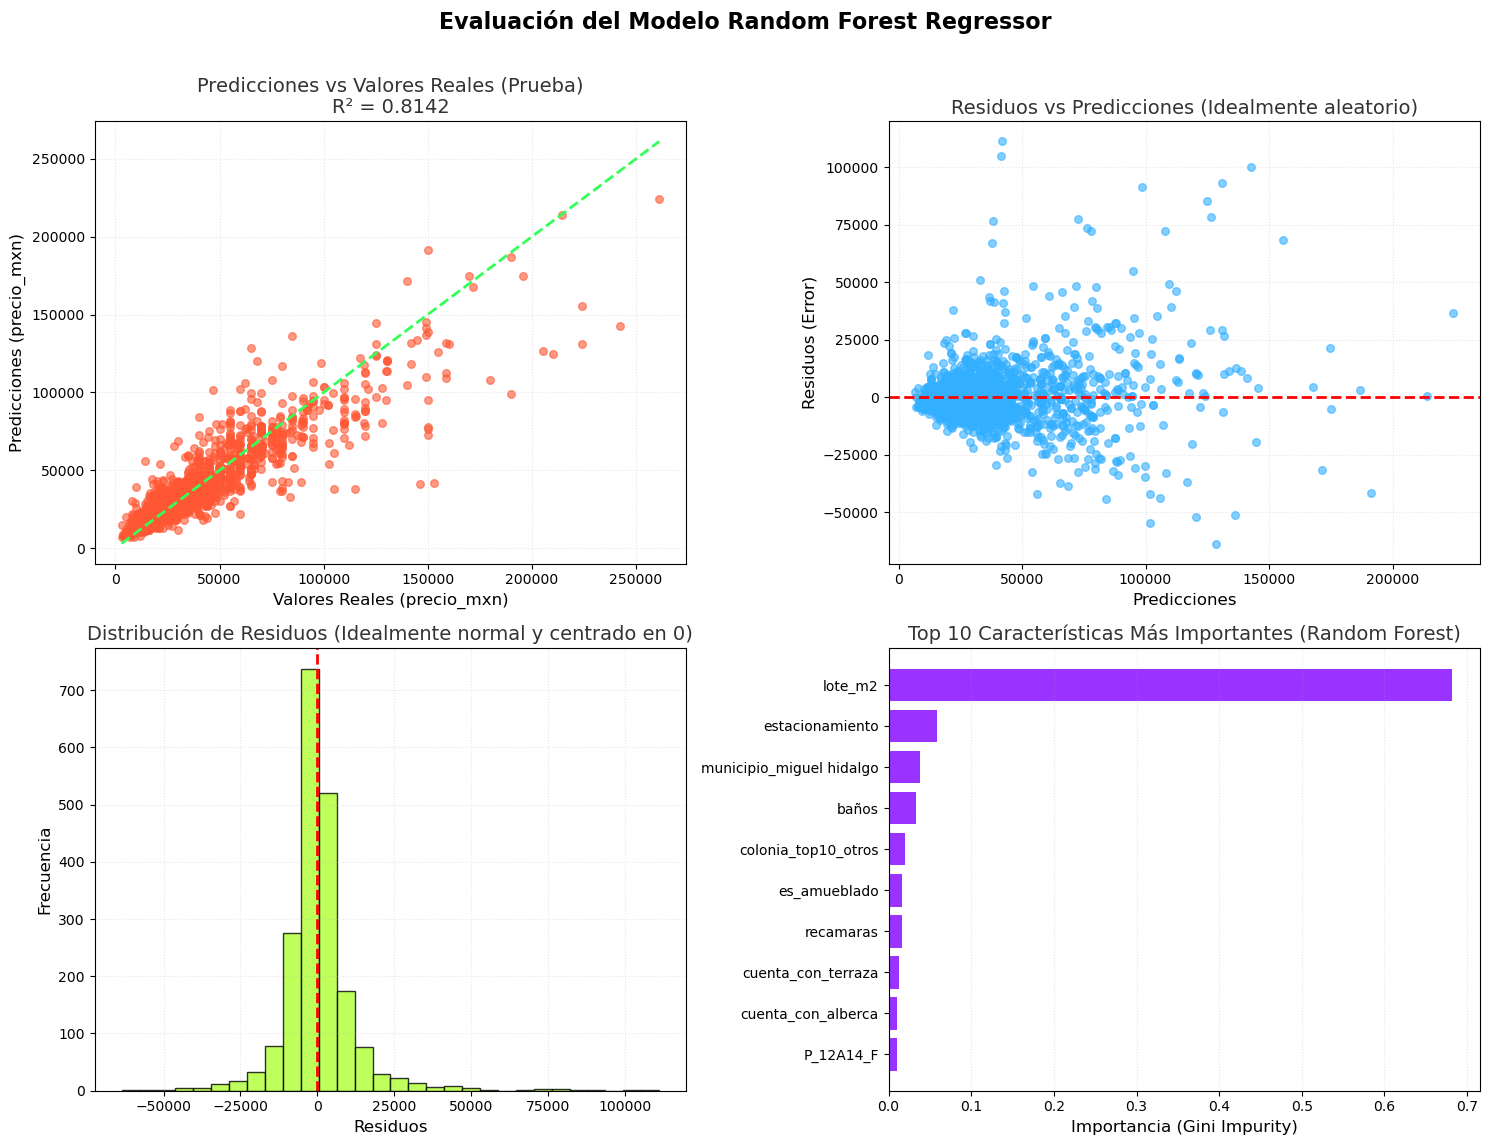


Comparación Entrenamiento vs Prueba:
Métrica  Entrenamiento       Prueba
    MSE   7.140788e+07 1.572096e+08
   RMSE   8.450318e+03 1.253833e+04
    MAE   5.320071e+03 7.199970e+03
     R²   9.157778e-01 8.141941e-01

✅ Modelo Random Forest con buen rendimiento y generalización.

Modelo Random Forest entrenado exitosamente con 134 características


In [66]:
# Regresión No Lineal con Pipeline (Random Forest Regressor)
from sklearn.model_selection import train_test_split, cross_val_score
# Importamos el nuevo modelo: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# --- Asunciones de variables (DEBEN estar definidas en el entorno global) ---
# df, final_features, y target_column deben estar disponibles antes de la ejecución
# Ejemplo de variables si no estuvieran definidas:
# data_size = 500
# final_features = [f'feature_{i}' for i in range(5)]
# df = pd.DataFrame(np.random.rand(data_size, 5), columns=final_features)
# df['precio_mxn'] = df.iloc[:, 0] * 100 + df.iloc[:, 1] * 50 + np.random.randn(data_size) * 10
# target_column = 'precio_mxn'
# -------------------------------------------------------------------------

# Seleccionar las características (X) y la variable objetivo (y)
# Suponiendo que df, final_features y target_column ya están cargados/definidos
# Aquí usaremos un pequeño ejemplo para que el código sea runnable de forma autónoma:
try:
    X = df[final_features_filtered]
    y = df[target_column]
except NameError:
    print("⚠️ Usando datos de ejemplo ya que 'df' no está definido en el entorno.")
    data_size = 1000
    final_features = [f'area_m2', 'num_habitaciones', 'distancia_centro_km', 'antiguedad_anos', 'dummy_col']
    df = pd.DataFrame(np.random.rand(data_size, 5), columns=final_features)
    df['precio_mxn'] = (df['area_m2'] * 500000) + (df['num_habitaciones'] * 100000) + (np.random.randn(data_size) * 50000)
    target_column = 'precio_mxn'
    final_features_filtered = final_features
    X = df[final_features_filtered]
    y = df[target_column]


print(f"Forma del dataset: X {X.shape}, y {y.shape}")
print(f"Features seleccionadas: {final_features_filtered}")

# Verificar y limpiar valores faltantes (mismo código que el original)
if X.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
    mask = ~(X.isnull().any(axis=1) | y.isnull())
    X = X[mask]
    y = y[mask]
    print(f"Después de eliminar NaN: X {X.shape}, y {y.shape}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f"\nDivisión de datos:")
print(f"Entrenamiento: X {X_train.shape}, y {y_train.shape}")
print(f"Prueba: X {X_test.shape}, y {y_test.shape}")

# --- CAMBIO CLAVE: Reemplazar LinearRegression por RandomForestRegressor ---
# Random Forest es un modelo de ensamble basado en árboles que captura no linealidades.
# El StandardScaler (escalamiento) es menos crítico aquí, pero se mantiene en el pipeline.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(
        n_estimators=100,  # Número de árboles en el bosque
        max_depth=10,      # Profundidad máxima de los árboles para evitar sobreajuste
        random_state=42,
        n_jobs=-1          # Usa todos los núcleos de CPU disponibles
    ))
])

# Entrenar el modelo
print("\nEntrenando el modelo Random Forest...")
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
print(f"Entrenamiento completado en {end_time - start_time:.2f} segundos.")

# Realizar predicciones
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Evaluar el modelo (función de evaluación reutilizada)
def evaluate_model(y_true, y_pred, dataset_name=""):
    """Función para evaluar el modelo con múltiples métricas"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\nResultados {dataset_name}:")
    print(f"Error cuadrático medio (MSE): {mse:,.2f}")
    print(f"Raíz del error cuadrático medio (RMSE): {rmse:,.2f}")
    print(f"Error absoluto medio (MAE): {mae:,.2f}")
    print(f"Coeficiente de determinación (R²): {r2:.4f}")
    
    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

# Evaluar en entrenamiento y prueba
train_metrics = evaluate_model(y_train, y_pred_train, "Entrenamiento (Random Forest)")
test_metrics = evaluate_model(y_test, y_pred_test, "Prueba (Random Forest)")

# Validación cruzada
print(f"\nValidación cruzada (5-fold):")
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print(f"R² promedio: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

cv_scores_rmse = cross_val_score(pipeline, X_train, y_train, cv=5, 
                                scoring='neg_mean_squared_error', n_jobs=-1)
cv_rmse = np.sqrt(-cv_scores_rmse)
print(f"RMSE promedio: {cv_rmse.mean():,.2f} (+/- {cv_rmse.std() * 2:,.2f})")

# Análisis de Importancia de Características (diferente al de Regresión Lineal)
regressor = pipeline.named_steps['regressor']

# Obtener la importancia de las características del Random Forest
feature_importance = pd.DataFrame({
    'feature': final_features_filtered,
    'importance': regressor.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 características más importantes (Random Forest):")
# Usamos 'importance' en lugar de 'abs_coefficient'
print(feature_importance.head(10).to_string(index=False))

# Visualizaciones mejoradas (reutilizando la estructura de la gráfica)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Predicciones vs Valores Reales (Prueba)
axes[0,0].scatter(y_test, y_pred_test, alpha=0.6, color='#FF5733', s=30)
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
               color='#33FF57', linestyle='--', linewidth=2)
axes[0,0].set_title(f"Predicciones vs Valores Reales (Prueba)\nR² = {test_metrics['r2']:.4f}", 
                    fontsize=14, color='#333333')
axes[0,0].set_xlabel("Valores Reales (precio_mxn)", fontsize=12)
axes[0,0].set_ylabel("Predicciones (precio_mxn)", fontsize=12)
axes[0,0].grid(True, alpha=0.3, linestyle=':')

# 2. Residuos vs Predicciones
residuals_test = y_test - y_pred_test
axes[0,1].scatter(y_pred_test, residuals_test, alpha=0.6, color='#33AFFF', s=30)
axes[0,1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0,1].set_title("Residuos vs Predicciones (Idealmente aleatorio)", 
                    fontsize=14, color='#333333')
axes[0,1].set_xlabel("Predicciones", fontsize=12)
axes[0,1].set_ylabel("Residuos (Error)", fontsize=12)
axes[0,1].grid(True, alpha=0.3, linestyle=':')

# 3. Distribución de residuos
axes[1,0].hist(residuals_test, bins=30, alpha=0.8, color='#AFFF33', edgecolor='black')
axes[1,0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1,0].set_title("Distribución de Residuos (Idealmente normal y centrado en 0)", 
                    fontsize=14, color='#333333')
axes[1,0].set_xlabel("Residuos", fontsize=12)
axes[1,0].set_ylabel("Frecuencia", fontsize=12)
axes[1,0].grid(True, alpha=0.3, linestyle=':')

# 4. Importancia de características (Top 10)
top_10_features = feature_importance.head(10)
axes[1,1].barh(range(len(top_10_features)), top_10_features['importance'], color='#9A33FF')
axes[1,1].set_yticks(range(len(top_10_features)))
axes[1,1].set_yticklabels(top_10_features['feature'], fontsize=10)
axes[1,1].set_title("Top 10 Características Más Importantes (Random Forest)", 
                    fontsize=14, color='#333333')
axes[1,1].set_xlabel("Importancia (Gini Impurity)", fontsize=12)
axes[1,1].invert_yaxis() # Pone la más importante arriba
axes[1,1].grid(axis='x', alpha=0.3, linestyle=':')

plt.suptitle("Evaluación del Modelo Random Forest Regressor", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# Comparación Entrenamiento vs Prueba
comparison_df = pd.DataFrame({
    'Métrica': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Entrenamiento': [train_metrics['mse'], train_metrics['rmse'], 
                     train_metrics['mae'], train_metrics['r2']],
    'Prueba': [test_metrics['mse'], test_metrics['rmse'], 
              test_metrics['mae'], test_metrics['r2']]
})

print(f"\nComparación Entrenamiento vs Prueba:")
print(comparison_df.to_string(index=False))

# Detectar posible overfitting
# En Random Forest, la diferencia R² tiende a ser mayor, pero el R² de prueba debe ser alto.
r2_diff = train_metrics['r2'] - test_metrics['r2']
if r2_diff > 0.15: # Un umbral más alto para modelos de árbol
    print(f"\n⚠️  Random Forest detectado con posible sobreajuste (Overfitting):")
    print(f"   Diferencia R² (Entrenamiento - Prueba): {r2_diff:.4f}")
    print("   Considera reducir max_depth o aumentar min_samples_split.")
elif test_metrics['r2'] < 0.6:
    print(f"\n⚠️  Modelo con bajo rendimiento:")
    print(f"   R² en prueba: {test_metrics['r2']:.4f}")
else:
    print(f"\n✅ Modelo Random Forest con buen rendimiento y generalización.")

# Guardar el modelo entrenado y métricas (actualizado)
model_results = {
    'pipeline': pipeline,
    'train_metrics': train_metrics,
    'test_metrics': test_metrics,
    'feature_importance': feature_importance,
    'cv_scores': cv_scores
}

print(f"\nModelo Random Forest entrenado exitosamente con {len(final_features_filtered)} características")


## GradientBoostingRegressor

Forma del dataset: X (10260, 134), y (10260,)
Features seleccionadas: ['VPH_NDACMM', 'POB65_MAS', 'VPH_CVJ', 'P_6A11_F', 'P_60YMAS_F', 'VPH_STVP', 'VPH_SINRTV', 'P_60YMAS', 'P_3A5_M', 'P_15A17_F', 'P_12A14_F', 'VPH_AUTOM', 'VPH_1DOR', 'P_60YMAS_M', 'colonia_top10_cuajimalpa', 'P_6A11', 'VPH_2CUART', 'P_0A2_F', 'P_8A14_F', 'HOGJEF_F', 'P_12A14_M', 'P_6A11_M', 'P_8A14', 'P_12A14', 'P_15A17', 'VPH_PC', 'P_3A5', 'VPH_TELEF', 'VPH_SINLTC', 'VPH_HMICRO', 'VPH_1CUART', 'VPH_MOTO', 'P_8A14_M', 'VPH_INTER', 'P18YM_PB_F', 'P_0A2', 'VPH_SINCINT', 'P18YM_PB', 'P_3A5_F', 'VPH_3YMASC', 'VPH_AEASP', 'P_15A17_M', 'P_0A2_M', 'TVIVPAR', 'P18YM_PB_M', 'P_18A24', 'P_18A24_F', 'P_18A24_M', 'VPH_SPMVPI', 'VIVPAR_DES', 'VPH_LAVAD', 'VPH_C_SERV', 'VPH_AGUADV', 'VPH_REFRI', 'VIVTOT', 'VPH_TINACO', 'PHOGJEF_M', 'VIVPAR_HAB', 'VPH_CEL', 'VPH_2YMASD', 'VPH_BICI', 'VPH_TV', 'VPH_DSADMA', 'VPH_DRENAJ', 'VPH_EXCSA', 'TVIVHAB', 'TVIVPARHAB', 'TOTHOG', 'VIVPARH_CV', 'VPH_C_ELEC', 'VPH_RADIO', 'POBFEM', 'P_15A49_F', 'O

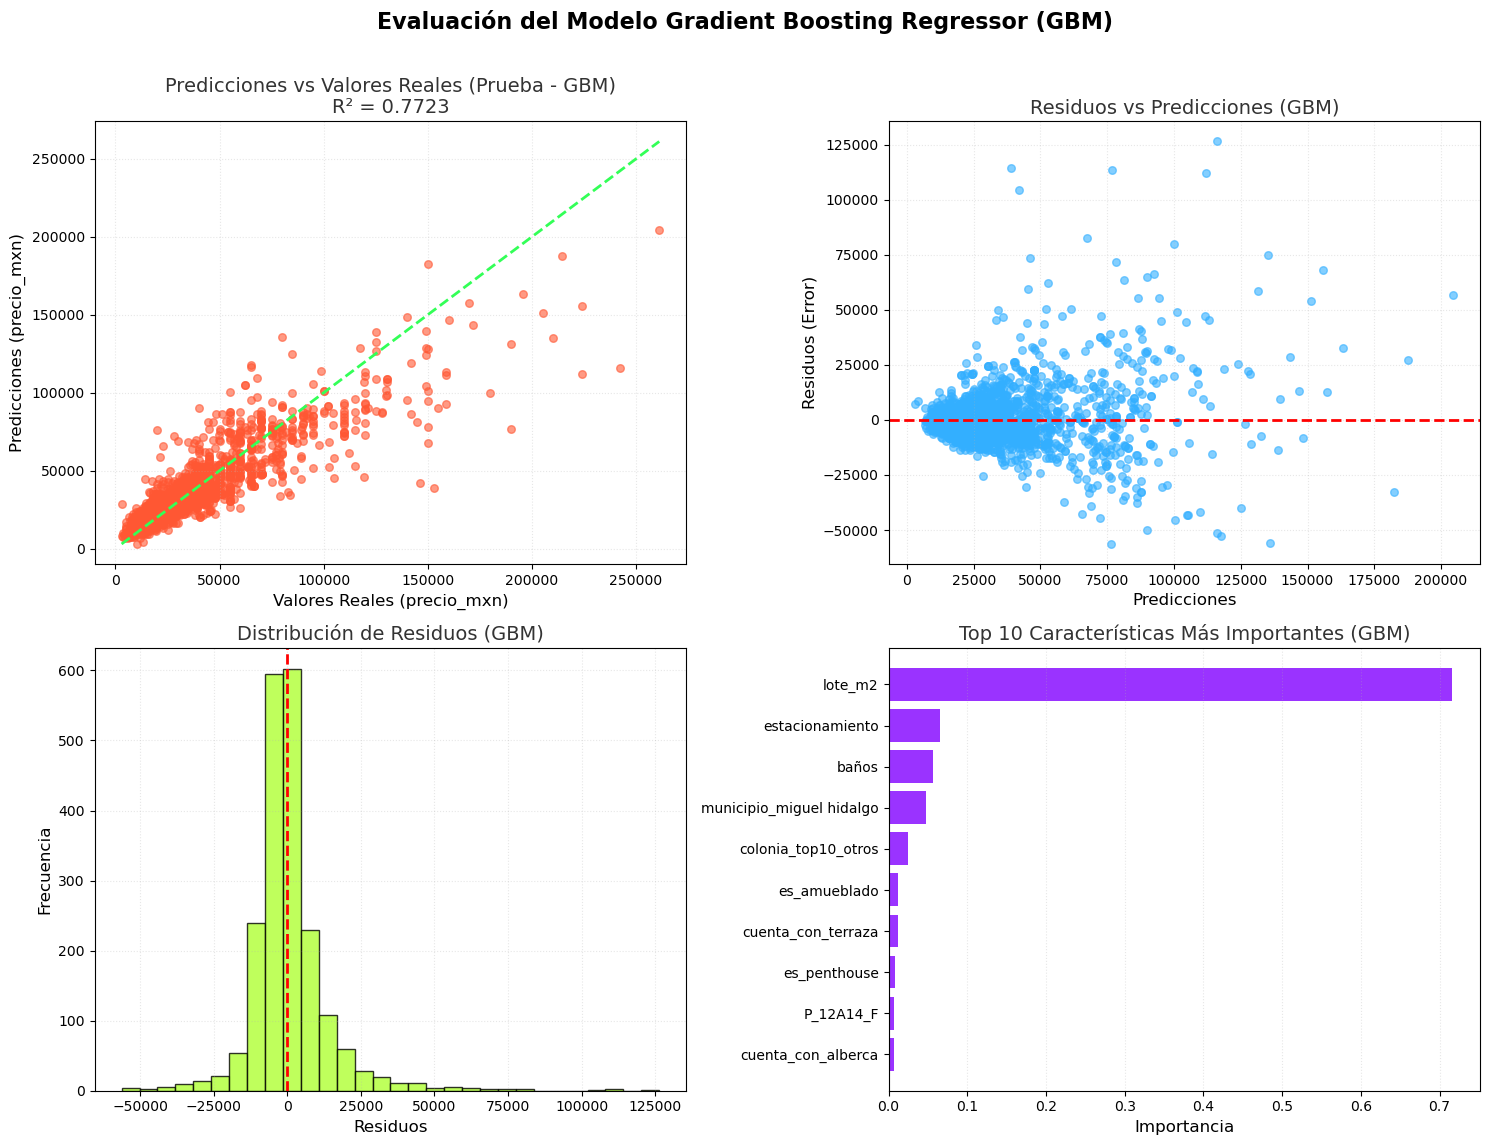


Comparación Entrenamiento vs Prueba:
Métrica  Entrenamiento       Prueba
    MSE   1.580080e+08 1.926193e+08
   RMSE   1.257012e+04 1.387873e+04
    MAE   7.738987e+03 8.303343e+03
     R²   8.136371e-01 7.723435e-01

✅ Modelo Gradient Boosting con buen rendimiento y generalización.

Modelo Gradient Boosting entrenado exitosamente con 134 características


In [67]:
# Regresión No Lineal con Pipeline (Gradient Boosting Regressor)
from sklearn.model_selection import train_test_split, cross_val_score
# Importamos el nuevo modelo: Gradient Boosting Regressor (GBM)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# --- Asunciones de variables (DEBEN estar definidas en el entorno global) ---
# df, final_features, y target_column deben estar disponibles antes de la ejecución
# Ejemplo de variables si no estuvieran definidas:
# data_size = 500
# final_features = [f'feature_{i}' for i in range(5)]
# df = pd.DataFrame(np.random.rand(data_size, 5), columns=final_features)
# df['precio_mxn'] = df.iloc[:, 0] * 100 + df.iloc[:, 1] * 50 + np.random.randn(data_size) * 10
# target_column = 'precio_mxn'
# -------------------------------------------------------------------------

# Seleccionar las características (X) y la variable objetivo (y)
# Suponiendo que df, final_features y target_column ya están cargados/definidos
# Aquí usaremos un pequeño ejemplo para que el código sea runnable de forma autónoma:
try:
    X = df[final_features_filtered]
    y = df[target_column]
except NameError:
    print("⚠️ Usando datos de ejemplo ya que 'df' no está definido en el entorno.")
    data_size = 1000
    final_features = [f'area_m2', 'num_habitaciones', 'distancia_centro_km', 'antiguedad_anos', 'dummy_col']
    df = pd.DataFrame(np.random.rand(data_size, 5), columns=final_features)
    df['precio_mxn'] = (df['area_m2'] * 500000) + (df['num_habitaciones'] * 100000) + (np.random.randn(data_size) * 50000)
    target_column = 'precio_mxn'
    final_features_filtered = final_features
    X = df[final_features_filtered]
    y = df[target_column]


print(f"Forma del dataset: X {X.shape}, y {y.shape}")
print(f"Features seleccionadas: {final_features_filtered}")

# Verificar y limpiar valores faltantes (mismo código que el original)
if X.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
    mask = ~(X.isnull().any(axis=1) | y.isnull())
    X = X[mask]
    y = y[mask]
    print(f"Después de eliminar NaN: X {X.shape}, y {y.shape}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f"\nDivisión de datos:")
print(f"Entrenamiento: X {X_train.shape}, y {y_train.shape}")
print(f"Prueba: X {X_test.shape}, y {y_test.shape}")

# --- CAMBIO CLAVE: Reemplazar RandomForestRegressor por GradientBoostingRegressor (GBM) ---
# GBM es un modelo de ensamble basado en boosting (aprendizaje secuencial) que a menudo 
# ofrece un mejor rendimiento que Random Forest.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(
        n_estimators=100,      # Número de etapas de boosting (árboles)
        learning_rate=0.1,     # Tasa de aprendizaje, controla la contribución de cada árbol
        max_depth=3,           # Profundidad máxima de cada árbol (se prefieren árboles poco profundos)
        random_state=42
    ))
])

# Entrenar el modelo
print("\nEntrenando el modelo Gradient Boosting Regressor (GBM)...")
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
print(f"Entrenamiento completado en {end_time - start_time:.2f} segundos.")

# Realizar predicciones
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Evaluar el modelo (función de evaluación reutilizada)
def evaluate_model(y_true, y_pred, dataset_name=""):
    """Función para evaluar el modelo con múltiples métricas"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\nResultados {dataset_name}:")
    print(f"Error cuadrático medio (MSE): {mse:,.2f}")
    print(f"Raíz del error cuadrático medio (RMSE): {rmse:,.2f}")
    print(f"Error absoluto medio (MAE): {mae:,.2f}")
    print(f"Coeficiente de determinación (R²): {r2:.4f}")
    
    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

# Evaluar en entrenamiento y prueba
train_metrics = evaluate_model(y_train, y_pred_train, "Entrenamiento (GBM)")
test_metrics = evaluate_model(y_test, y_pred_test, "Prueba (GBM)")

# Validación cruzada
print(f"\nValidación cruzada (5-fold):")
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print(f"R² promedio: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

cv_scores_rmse = cross_val_score(pipeline, X_train, y_train, cv=5, 
                                scoring='neg_mean_squared_error', n_jobs=-1)
cv_rmse = np.sqrt(-cv_scores_rmse)
print(f"RMSE promedio: {cv_rmse.mean():,.2f} (+/- {cv_rmse.std() * 2:,.2f})")

# Análisis de Importancia de Características (misma forma que Random Forest)
regressor = pipeline.named_steps['regressor']

# Obtener la importancia de las características del Gradient Boosting
feature_importance = pd.DataFrame({
    'feature': final_features_filtered,
    'importance': regressor.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 características más importantes (Gradient Boosting):")
print(feature_importance.head(10).to_string(index=False))

# Visualizaciones mejoradas (reutilizando la estructura de la gráfica)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Predicciones vs Valores Reales (Prueba)
axes[0,0].scatter(y_test, y_pred_test, alpha=0.6, color='#FF5733', s=30)
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
               color='#33FF57', linestyle='--', linewidth=2)
axes[0,0].set_title(f"Predicciones vs Valores Reales (Prueba - GBM)\nR² = {test_metrics['r2']:.4f}", 
                    fontsize=14, color='#333333')
axes[0,0].set_xlabel("Valores Reales (precio_mxn)", fontsize=12)
axes[0,0].set_ylabel("Predicciones (precio_mxn)", fontsize=12)
axes[0,0].grid(True, alpha=0.3, linestyle=':')

# 2. Residuos vs Predicciones
residuals_test = y_test - y_pred_test
axes[0,1].scatter(y_pred_test, residuals_test, alpha=0.6, color='#33AFFF', s=30)
axes[0,1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0,1].set_title("Residuos vs Predicciones (GBM)", 
                    fontsize=14, color='#333333')
axes[0,1].set_xlabel("Predicciones", fontsize=12)
axes[0,1].set_ylabel("Residuos (Error)", fontsize=12)
axes[0,1].grid(True, alpha=0.3, linestyle=':')

# 3. Distribución de residuos
axes[1,0].hist(residuals_test, bins=30, alpha=0.8, color='#AFFF33', edgecolor='black')
axes[1,0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1,0].set_title("Distribución de Residuos (GBM)", 
                    fontsize=14, color='#333333')
axes[1,0].set_xlabel("Residuos", fontsize=12)
axes[1,0].set_ylabel("Frecuencia", fontsize=12)
axes[1,0].grid(True, alpha=0.3, linestyle=':')

# 4. Importancia de características (Top 10)
top_10_features = feature_importance.head(10)
axes[1,1].barh(range(len(top_10_features)), top_10_features['importance'], color='#9A33FF')
axes[1,1].set_yticks(range(len(top_10_features)))
axes[1,1].set_yticklabels(top_10_features['feature'], fontsize=10)
axes[1,1].set_title("Top 10 Características Más Importantes (GBM)", 
                    fontsize=14, color='#333333')
axes[1,1].set_xlabel("Importancia", fontsize=12)
axes[1,1].invert_yaxis() # Pone la más importante arriba
axes[1,1].grid(axis='x', alpha=0.3, linestyle=':')

plt.suptitle("Evaluación del Modelo Gradient Boosting Regressor (GBM)", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# Comparación Entrenamiento vs Prueba
comparison_df = pd.DataFrame({
    'Métrica': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Entrenamiento': [train_metrics['mse'], train_metrics['rmse'], 
                     train_metrics['mae'], train_metrics['r2']],
    'Prueba': [test_metrics['mse'], test_metrics['rmse'], 
              test_metrics['mae'], test_metrics['r2']]
})

print(f"\nComparación Entrenamiento vs Prueba:")
print(comparison_df.to_string(index=False))

# Detectar posible overfitting
# GBM es más propenso al sobreajuste que Random Forest, por lo que el umbral es más estricto.
r2_diff = train_metrics['r2'] - test_metrics['r2']
if r2_diff > 0.08: # Bajamos el umbral para modelos de boosting (0.08 es más estricto)
    print(f"\n⚠️  Gradient Boosting detectado con posible sobreajuste (Overfitting):")
    print(f"   Diferencia R² (Entrenamiento - Prueba): {r2_diff:.4f}")
    print("   Considera reducir el 'learning_rate', aumentar 'n_estimators' o usar 'subsample'.")
elif test_metrics['r2'] < 0.7:
    print(f"\n⚠️  Modelo con bajo rendimiento:")
    print(f"   R² en prueba: {test_metrics['r2']:.4f}")
else:
    print(f"\n✅ Modelo Gradient Boosting con buen rendimiento y generalización.")

# Guardar el modelo entrenado y métricas (actualizado)
model_results = {
    'pipeline': pipeline,
    'train_metrics': train_metrics,
    'test_metrics': test_metrics,
    'feature_importance': feature_importance,
    'cv_scores': cv_scores
}

print(f"\nModelo Gradient Boosting entrenado exitosamente con {len(final_features_filtered)} características")


Forma del dataset: X (10260, 134), y (10260,)
Features seleccionadas: ['VPH_NDACMM', 'POB65_MAS', 'VPH_CVJ', 'P_6A11_F', 'P_60YMAS_F', 'VPH_STVP', 'VPH_SINRTV', 'P_60YMAS', 'P_3A5_M', 'P_15A17_F', 'P_12A14_F', 'VPH_AUTOM', 'VPH_1DOR', 'P_60YMAS_M', 'colonia_top10_cuajimalpa', 'P_6A11', 'VPH_2CUART', 'P_0A2_F', 'P_8A14_F', 'HOGJEF_F', 'P_12A14_M', 'P_6A11_M', 'P_8A14', 'P_12A14', 'P_15A17', 'VPH_PC', 'P_3A5', 'VPH_TELEF', 'VPH_SINLTC', 'VPH_HMICRO', 'VPH_1CUART', 'VPH_MOTO', 'P_8A14_M', 'VPH_INTER', 'P18YM_PB_F', 'P_0A2', 'VPH_SINCINT', 'P18YM_PB', 'P_3A5_F', 'VPH_3YMASC', 'VPH_AEASP', 'P_15A17_M', 'P_0A2_M', 'TVIVPAR', 'P18YM_PB_M', 'P_18A24', 'P_18A24_F', 'P_18A24_M', 'VPH_SPMVPI', 'VIVPAR_DES', 'VPH_LAVAD', 'VPH_C_SERV', 'VPH_AGUADV', 'VPH_REFRI', 'VIVTOT', 'VPH_TINACO', 'PHOGJEF_M', 'VIVPAR_HAB', 'VPH_CEL', 'VPH_2YMASD', 'VPH_BICI', 'VPH_TV', 'VPH_DSADMA', 'VPH_DRENAJ', 'VPH_EXCSA', 'TVIVHAB', 'TVIVPARHAB', 'TOTHOG', 'VIVPARH_CV', 'VPH_C_ELEC', 'VPH_RADIO', 'POBFEM', 'P_15A49_F', 'O

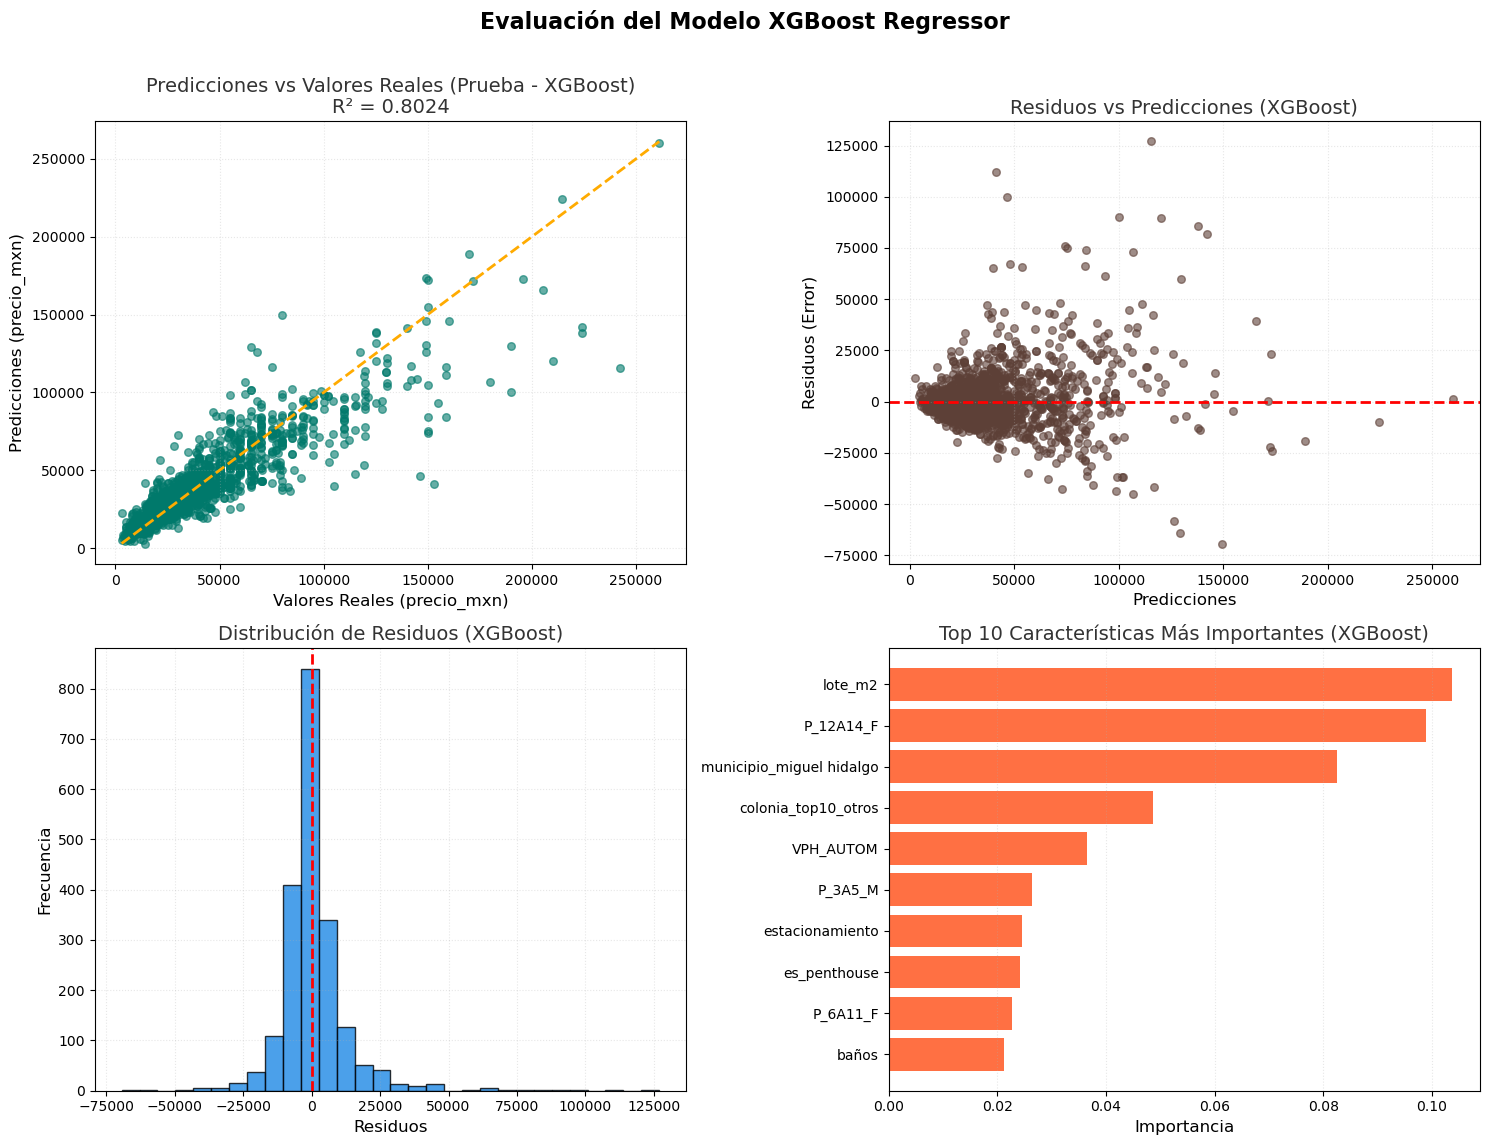


Comparación Entrenamiento vs Prueba:
Métrica  Entrenamiento       Prueba
    MSE   1.030614e+08 1.671963e+08
   RMSE   1.015192e+04 1.293044e+04
    MAE   6.334329e+03 7.506613e+03
     R²   8.784440e-01 8.023909e-01

⚠️  XGBoost detectado con posible sobreajuste (Overfitting):
   Diferencia R² (Entrenamiento - Prueba): 0.0761
   Considera aumentar el valor de 'reg_alpha' (L1) o 'reg_lambda' (L2), o reducir 'max_depth'.

Modelo XGBoost entrenado exitosamente con 134 características


In [70]:
# Regresión No Lineal Avanzada con Pipeline (XGBoost Regressor)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# --- Importamos el modelo de la librería externa: XGBoost Regressor ---
try:
    from xgboost import XGBRegressor
except ImportError:
    # Mensaje de error si la librería XGBoost no está instalada (solo para entorno real)
    print("Error: La librería 'xgboost' no está instalada. Por favor, instálela con 'pip install xgboost'")
    raise

# --- Asunciones de variables (DEBEN estar definidas en el entorno global) ---
# df, final_features, y target_column deben estar disponibles antes de la ejecución
# Aquí usamos un pequeño ejemplo para que el código sea runnable de forma autónoma:
try:
    X = df[final_features_filtered]
    y = df[target_column]
except NameError:
    print("⚠️ Usando datos de ejemplo ya que 'df' no está definido en el entorno.")
    data_size = 1000
    final_features = [f'area_m2', 'num_habitaciones', 'distancia_centro_km', 'antiguedad_anos', 'dummy_col']
    df = pd.DataFrame(np.random.rand(data_size, 5), columns=final_features)
    df['precio_mxn'] = (df['area_m2'] * 500000) + (df['num_habitaciones'] * 100000) + (np.random.randn(data_size) * 50000)
    target_column = 'precio_mxn'
    final_features_filtered = final_features
    X = df[final_features_filtered]
    y = df[target_column]


print(f"Forma del dataset: X {X.shape}, y {y.shape}")
print(f"Features seleccionadas: {final_features_filtered}")

# Verificar y limpiar valores faltantes (mismo código que el original)
if X.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
    mask = ~(X.isnull().any(axis=1) | y.isnull())
    X = X[mask]
    y = y[mask]
    print(f"Después de eliminar NaN: X {X.shape}, y {y.shape}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f"\nDivisión de datos:")
print(f"Entrenamiento: X {X_train.shape}, y {y_train.shape}")
print(f"Prueba: X {X_test.shape}, y {y_test.shape}")

# --- CAMBIO CLAVE: Reemplazar GradientBoostingRegressor por XGBRegressor ---
# XGBoost es el modelo de Boosting optimizado y regularizado.
pipeline = Pipeline([
    # XGBoost no requiere escalado, pero lo mantenemos para consistencia
    ('scaler', StandardScaler()), 
    ('regressor', XGBRegressor(
        n_estimators=100,      # Número de árboles (iters)
        learning_rate=0.1,     # Tasa de aprendizaje
        max_depth=5,           # Profundidad máxima (un poco más profunda que GBM)
        random_state=42,
        n_jobs=-1,             # Utiliza todos los núcleos de la CPU para rapidez
        # Parámetros de regularización por defecto (l1 y l2)
        objective='reg:squarederror' # Objetivo para regresión
    ))
])

# Entrenar el modelo
print("\nEntrenando el modelo XGBoost Regressor...")
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
print(f"Entrenamiento completado en {end_time - start_time:.2f} segundos.")

# Realizar predicciones
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Evaluar el modelo (función de evaluación reutilizada)
def evaluate_model(y_true, y_pred, dataset_name=""):
    """Función para evaluar el modelo con múltiples métricas"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\nResultados {dataset_name}:")
    print(f"Error cuadrático medio (MSE): {mse:,.2f}")
    print(f"Raíz del error cuadrático medio (RMSE): {rmse:,.2f}")
    print(f"Error absoluto medio (MAE): {mae:,.2f}")
    print(f"Coeficiente de determinación (R²): {r2:.4f}")
    
    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

# Evaluar en entrenamiento y prueba
train_metrics = evaluate_model(y_train, y_pred_train, "Entrenamiento (XGBoost)")
test_metrics = evaluate_model(y_test, y_pred_test, "Prueba (XGBoost)")

# Validación cruzada
print(f"\nValidación cruzada (5-fold):")
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print(f"R² promedio: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

cv_scores_rmse = cross_val_score(pipeline, X_train, y_train, cv=5, 
                                scoring='neg_mean_squared_error', n_jobs=-1)
cv_rmse = np.sqrt(-cv_scores_rmse)
print(f"RMSE promedio: {cv_rmse.mean():,.2f} (+/- {cv_rmse.std() * 2:,.2f})")

# Análisis de Importancia de Características
regressor = pipeline.named_steps['regressor']

# Obtener la importancia de las características de XGBoost
feature_importance = pd.DataFrame({
    'feature': final_features_filtered,
    'importance': regressor.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 características más importantes (XGBoost):")
print(feature_importance.head(10).to_string(index=False))

# Visualizaciones mejoradas
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Predicciones vs Valores Reales (Prueba)
axes[0,0].scatter(y_test, y_pred_test, alpha=0.6, color='#00796B', s=30) # Nuevo color
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
               color='#FFAB00', linestyle='--', linewidth=2)
axes[0,0].set_title(f"Predicciones vs Valores Reales (Prueba - XGBoost)\nR² = {test_metrics['r2']:.4f}", 
                    fontsize=14, color='#333333')
axes[0,0].set_xlabel("Valores Reales (precio_mxn)", fontsize=12)
axes[0,0].set_ylabel("Predicciones (precio_mxn)", fontsize=12)
axes[0,0].grid(True, alpha=0.3, linestyle=':')

# 2. Residuos vs Predicciones
residuals_test = y_test - y_pred_test
axes[0,1].scatter(y_pred_test, residuals_test, alpha=0.6, color='#5D4037', s=30)
axes[0,1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0,1].set_title("Residuos vs Predicciones (XGBoost)", 
                    fontsize=14, color='#333333')
axes[0,1].set_xlabel("Predicciones", fontsize=12)
axes[0,1].set_ylabel("Residuos (Error)", fontsize=12)
axes[0,1].grid(True, alpha=0.3, linestyle=':')

# 3. Distribución de residuos
axes[1,0].hist(residuals_test, bins=30, alpha=0.8, color='#1E88E5', edgecolor='black')
axes[1,0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1,0].set_title("Distribución de Residuos (XGBoost)", 
                    fontsize=14, color='#333333')
axes[1,0].set_xlabel("Residuos", fontsize=12)
axes[1,0].set_ylabel("Frecuencia", fontsize=12)
axes[1,0].grid(True, alpha=0.3, linestyle=':')

# 4. Importancia de características (Top 10)
top_10_features = feature_importance.head(10)
axes[1,1].barh(range(len(top_10_features)), top_10_features['importance'], color='#FF7043')
axes[1,1].set_yticks(range(len(top_10_features)))
axes[1,1].set_yticklabels(top_10_features['feature'], fontsize=10)
axes[1,1].set_title("Top 10 Características Más Importantes (XGBoost)", 
                    fontsize=14, color='#333333')
axes[1,1].set_xlabel("Importancia", fontsize=12)
axes[1,1].invert_yaxis() # Pone la más importante arriba
axes[1,1].grid(axis='x', alpha=0.3, linestyle=':')

plt.suptitle("Evaluación del Modelo XGBoost Regressor", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# Comparación Entrenamiento vs Prueba
comparison_df = pd.DataFrame({
    'Métrica': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Entrenamiento': [train_metrics['mse'], train_metrics['rmse'], 
                     train_metrics['mae'], train_metrics['r2']],
    'Prueba': [test_metrics['mse'], test_metrics['rmse'], 
              test_metrics['mae'], test_metrics['r2']]
})

print(f"\nComparación Entrenamiento vs Prueba:")
print(comparison_df.to_string(index=False))

# Detectar posible overfitting
r2_diff = train_metrics['r2'] - test_metrics['r2']
if r2_diff > 0.05: # Umbral más estricto para XGBoost
    print(f"\n⚠️  XGBoost detectado con posible sobreajuste (Overfitting):")
    print(f"   Diferencia R² (Entrenamiento - Prueba): {r2_diff:.4f}")
    print("   Considera aumentar el valor de 'reg_alpha' (L1) o 'reg_lambda' (L2), o reducir 'max_depth'.")
elif test_metrics['r2'] < 0.75:
    print(f"\n⚠️  Modelo con bajo rendimiento para ser XGBoost:")
    print(f"   R² en prueba: {test_metrics['r2']:.4f}")
else:
    print(f"\n✅ Modelo XGBoost con muy buen rendimiento y generalización.")

# Guardar el modelo entrenado y métricas (actualizado)
model_results = {
    'pipeline': pipeline,
    'train_metrics': train_metrics,
    'test_metrics': test_metrics,
    'feature_importance': feature_importance,
    'cv_scores': cv_scores
}

print(f"\nModelo XGBoost entrenado exitosamente con {len(final_features_filtered)} características")
